
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

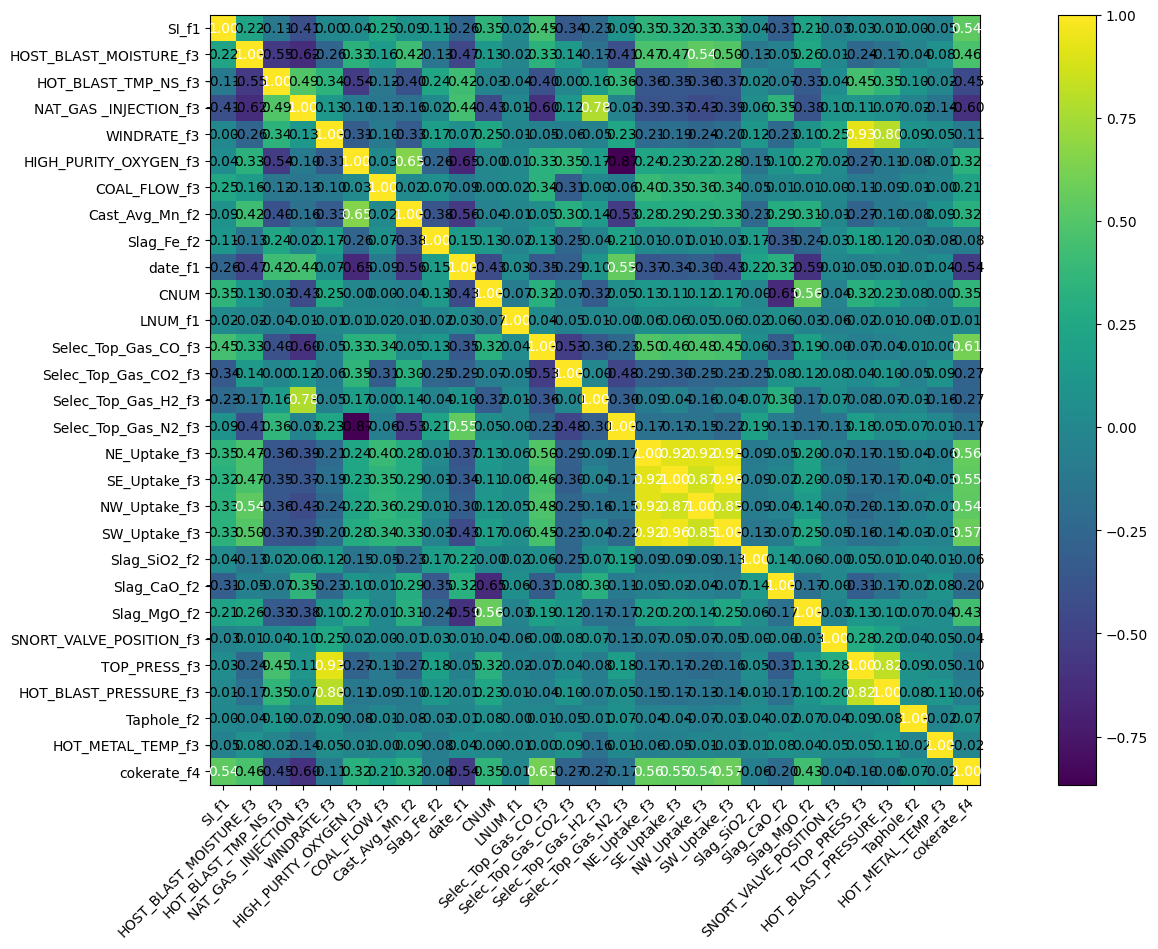

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

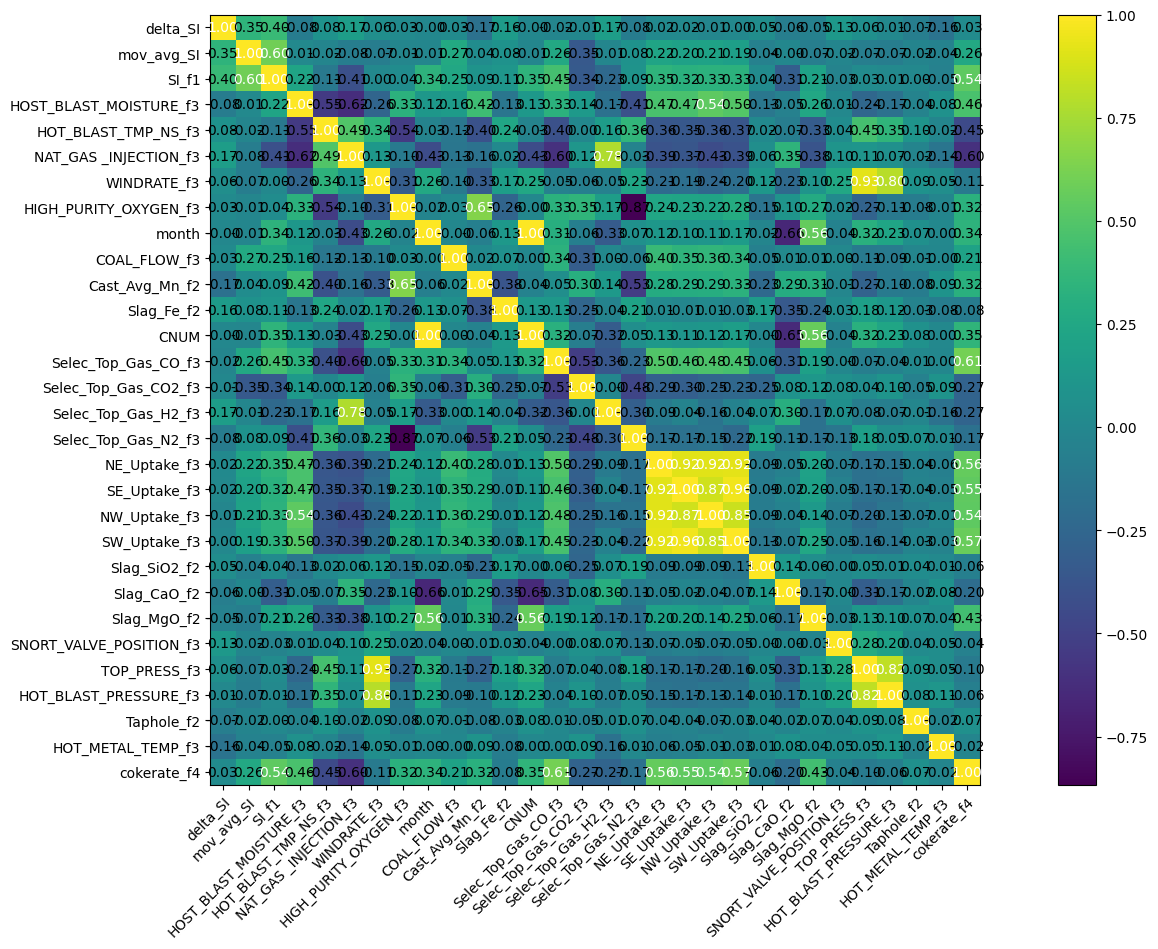

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.110363
Loss_SI: 1.3169349431991577 Loss_all: 1.19440758228302
===


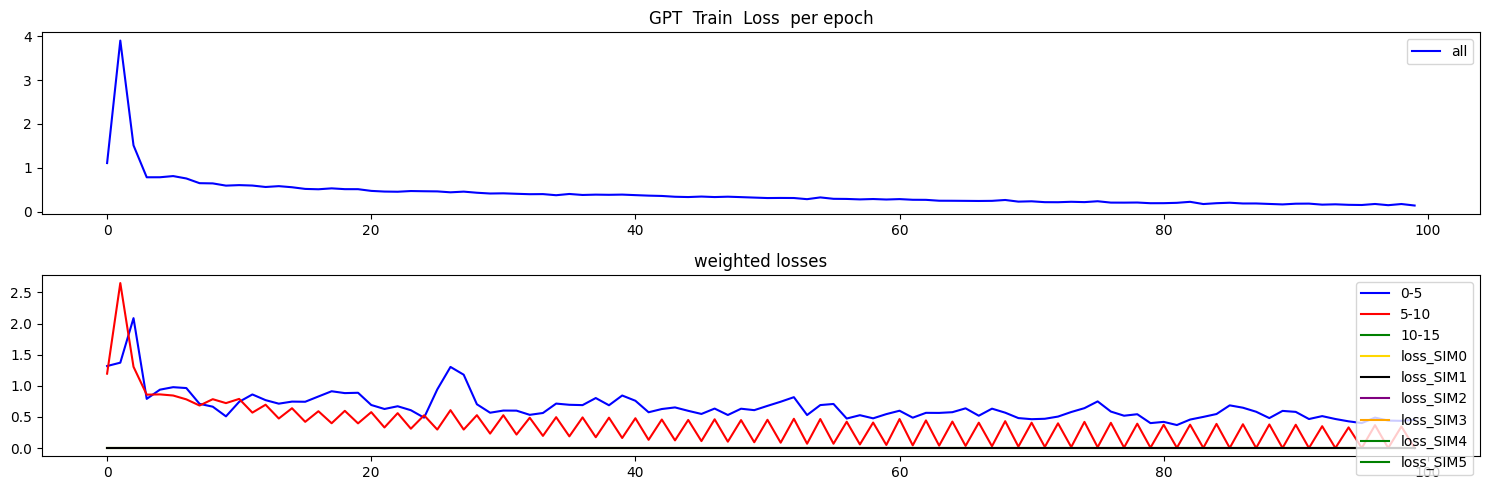

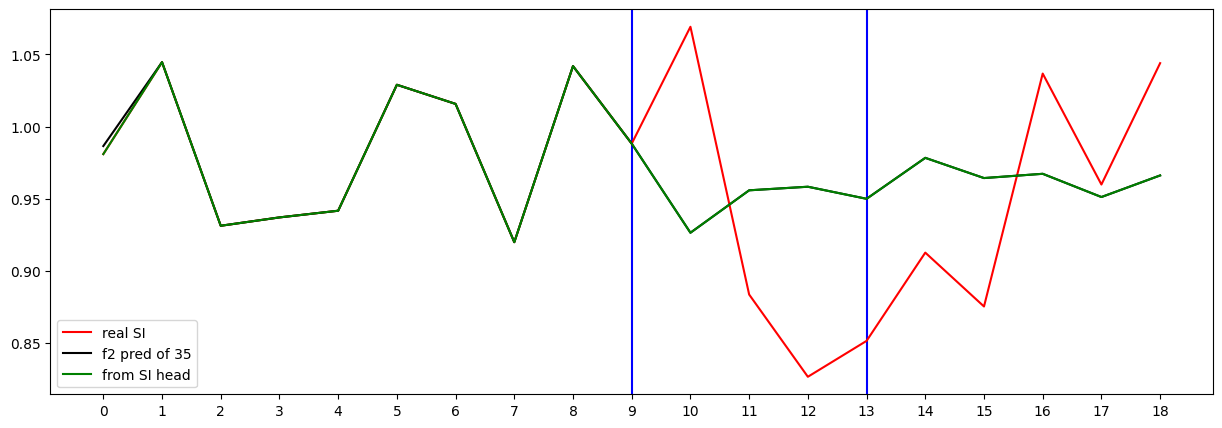

Testing R**2 - (all) - (no inputs):  0.9891087444161135
Testing R**2 - (f2) - SI full (no inputs):  -0.11788039955225038
Testing R**2 - SI head only (no inputs):  -0.11788039955225038
0 ...index R**2 (no inputs):  -0.14623796914493492
1 ...index R**2 (no inputs):  -1.923615853454351
2 ...index R**2 (no inputs):  -0.11788039955225038
3 ...index R**2 (no inputs):  -123.9809945581713
4 ...index R**2 (no inputs):  -5.21205723263857
5 ...index R**2 (no inputs):  -3.458012287177021
6 ...index R**2 (no inputs):  -0.35649088858071476
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.034113820907556214
10 ...index R**2 (no inputs):  -0.008761271925667558
11 ...index R**2 (no inputs):  -14.948295228518452
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9306002991427889
16 ...index R**2 (no inputs):  -2.068578631270947
17 ...index R**2 (no inputs):  -28.891

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.194247
Loss_SI: 1.7125729322433472 Loss_all: 1.2376192808151245
===


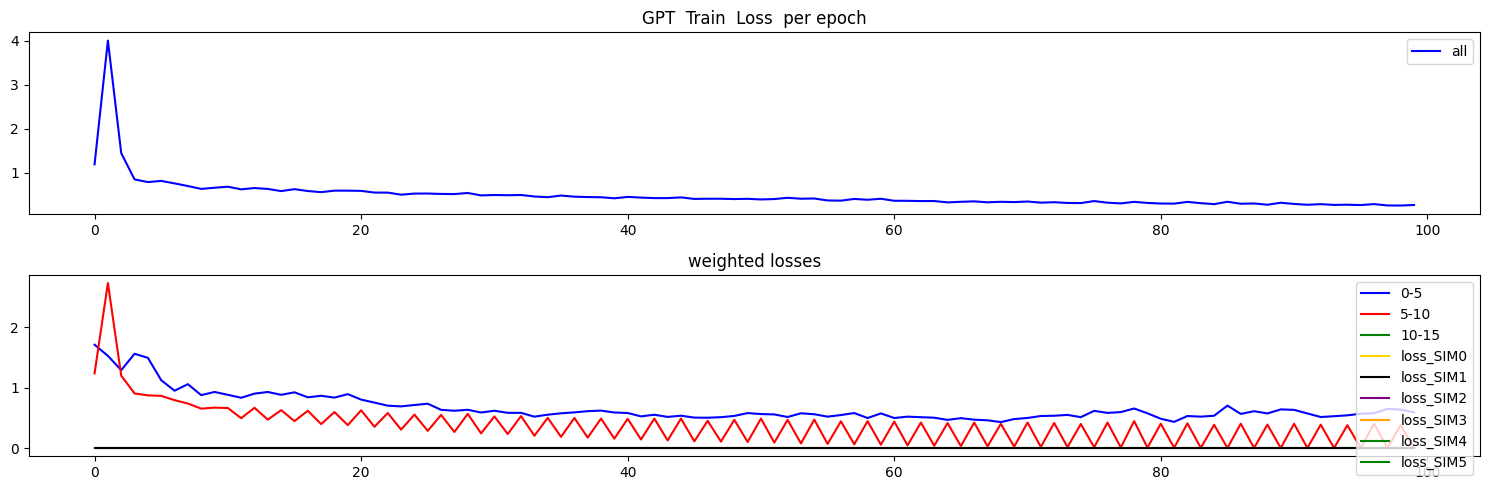

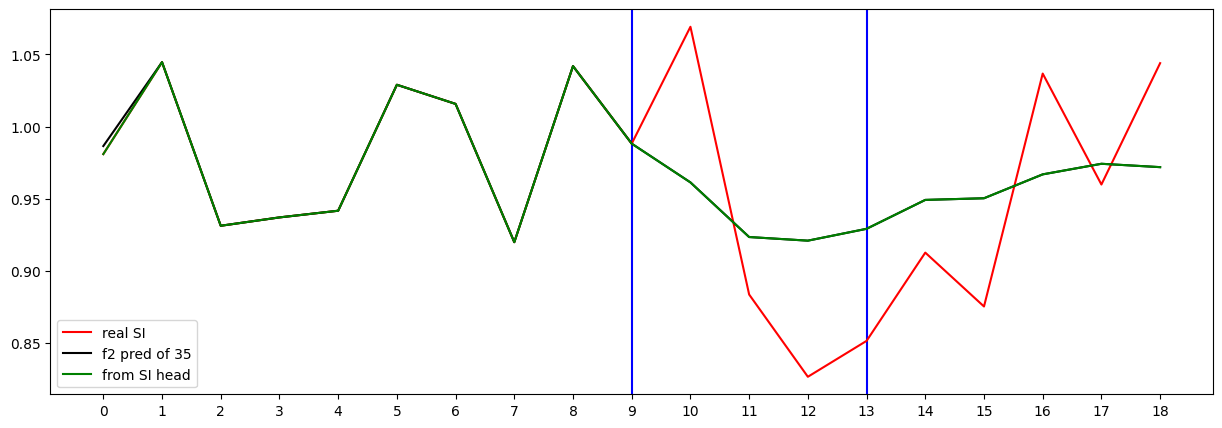

Testing R**2 - (all) - (no inputs):  0.9895507121951809
Testing R**2 - (f2) - SI full (no inputs):  0.2338858018158808
Testing R**2 - SI head only (no inputs):  0.2338858018158808
0 ...index R**2 (no inputs):  -0.2950603965663139
1 ...index R**2 (no inputs):  -0.609383204696103
2 ...index R**2 (no inputs):  0.2338858018158808
3 ...index R**2 (no inputs):  -60.78464636312922
4 ...index R**2 (no inputs):  -0.840100910692611
5 ...index R**2 (no inputs):  -3.264783462945693
6 ...index R**2 (no inputs):  -0.323099636939441
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.04198321064318966
10 ...index R**2 (no inputs):  -0.12496268172430036
11 ...index R**2 (no inputs):  -16.016784873894707
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -8.01234272674191
16 ...index R**2 (no inputs):  -1.0180136757998697
17 ...index R**2 (no inputs):  -202.91994761764587

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.267315
Loss_SI: 1.245692253112793 Loss_all: 1.290444254875183
===


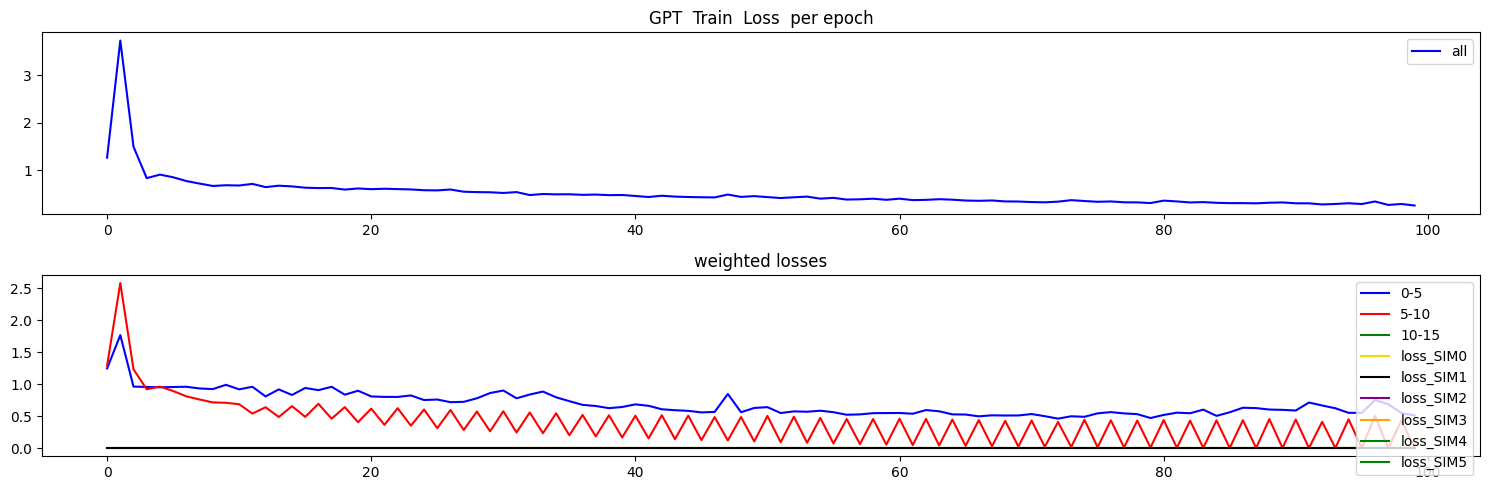

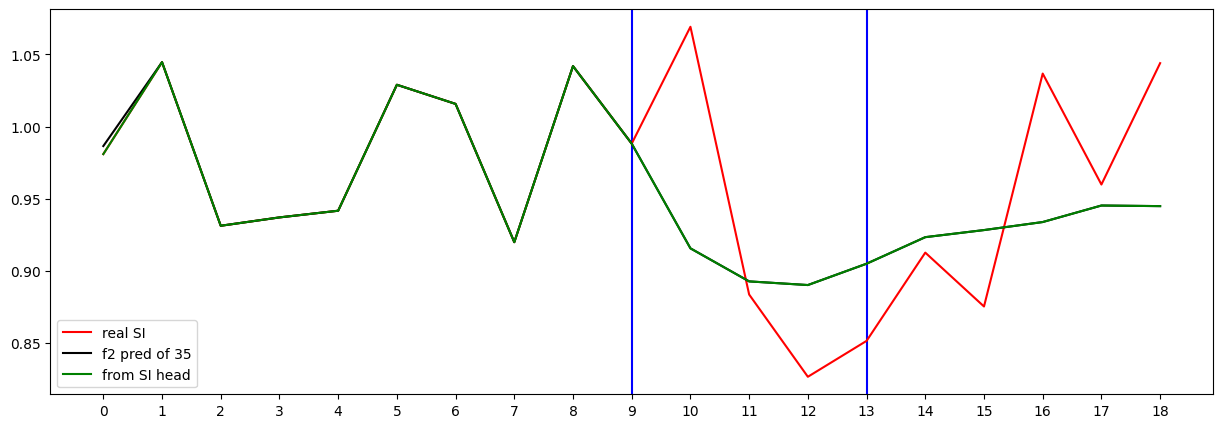

Testing R**2 - (all) - (no inputs):  0.9963804819756082
Testing R**2 - (f2) - SI full (no inputs):  0.34746109724286034
Testing R**2 - SI head only (no inputs):  0.34746109724286034
0 ...index R**2 (no inputs):  0.1040183378667967
1 ...index R**2 (no inputs):  0.19898353127943413
2 ...index R**2 (no inputs):  0.34746109724286034
3 ...index R**2 (no inputs):  -83.21064676819816
4 ...index R**2 (no inputs):  -0.2569273130531575
5 ...index R**2 (no inputs):  -0.46509969152152486
6 ...index R**2 (no inputs):  -0.343776720075885
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.008215369240873294
10 ...index R**2 (no inputs):  -0.13019926903685142
11 ...index R**2 (no inputs):  -22.742561632595894
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.977949686558666
16 ...index R**2 (no inputs):  -2.4699564073784503
17 ...index R**2 (no inputs):  -114.126091

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.260996
Loss_SI: 1.4413819313049316 Loss_all: 1.2903631925582886
===


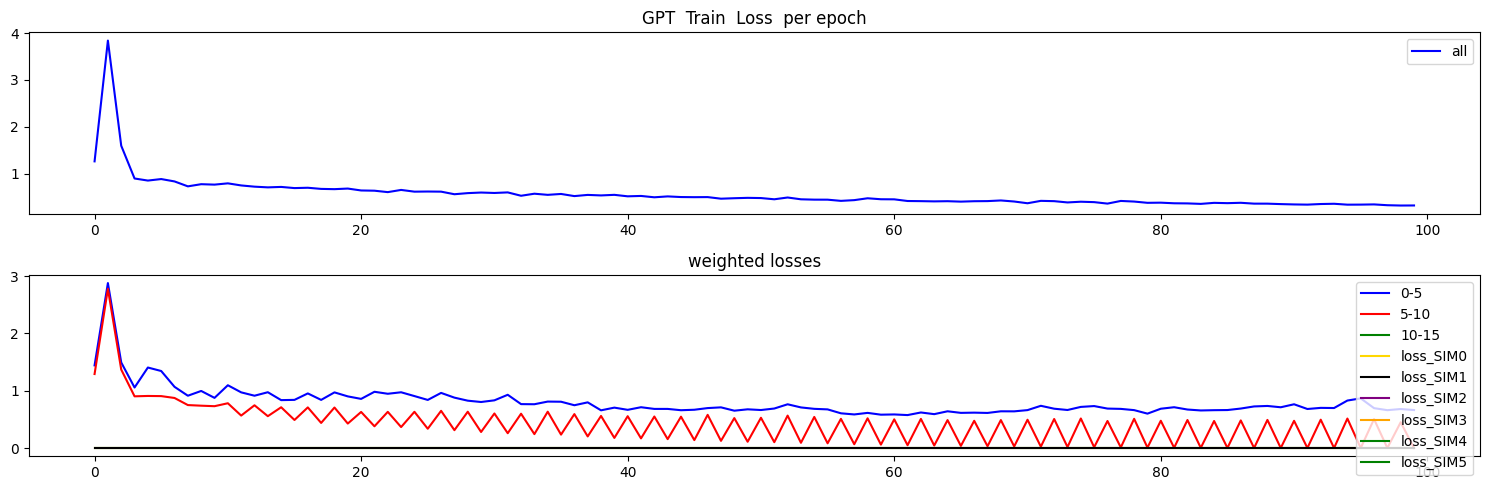

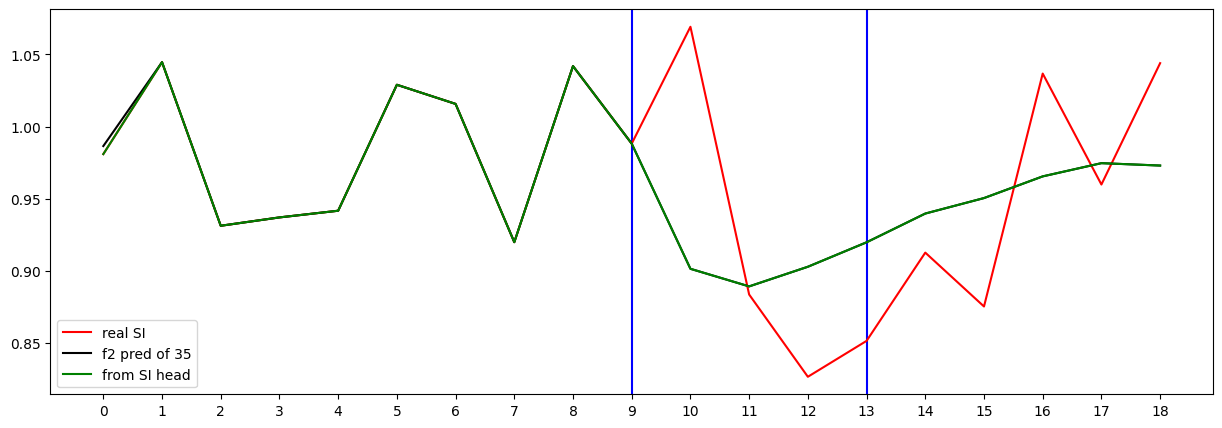

Testing R**2 - (all) - (no inputs):  0.9986549179026016
Testing R**2 - (f2) - SI full (no inputs):  0.5330621388340695
Testing R**2 - SI head only (no inputs):  0.5330621388340695
0 ...index R**2 (no inputs):  0.08938578642600992
1 ...index R**2 (no inputs):  -0.291014330533798
2 ...index R**2 (no inputs):  0.5330621388340695
3 ...index R**2 (no inputs):  -59.672454448989114
4 ...index R**2 (no inputs):  0.04631429677768906
5 ...index R**2 (no inputs):  0.47694769631944534
6 ...index R**2 (no inputs):  -0.1650050233862128
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.008106040843216977
10 ...index R**2 (no inputs):  -0.10823680398174917
11 ...index R**2 (no inputs):  -5.790720091443021
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.590802308195589
16 ...index R**2 (no inputs):  -0.43294586008156966
17 ...index R**2 (no inputs):  -64.628066993

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.134094
Loss_SI: 1.3565242290496826 Loss_all: 1.0927034616470337
===


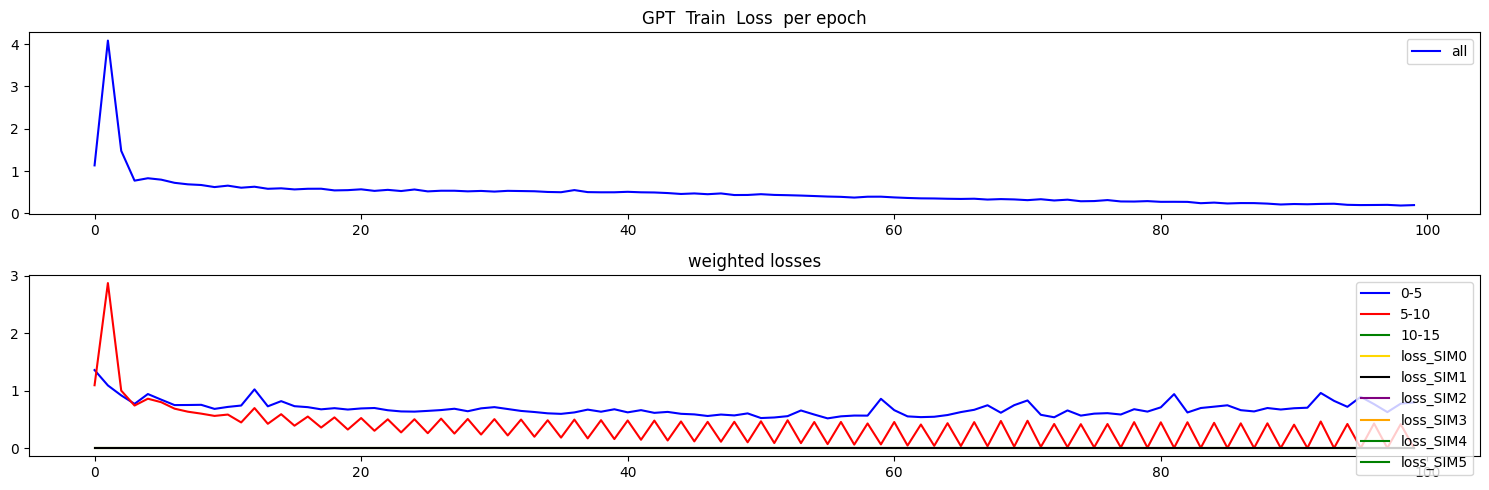

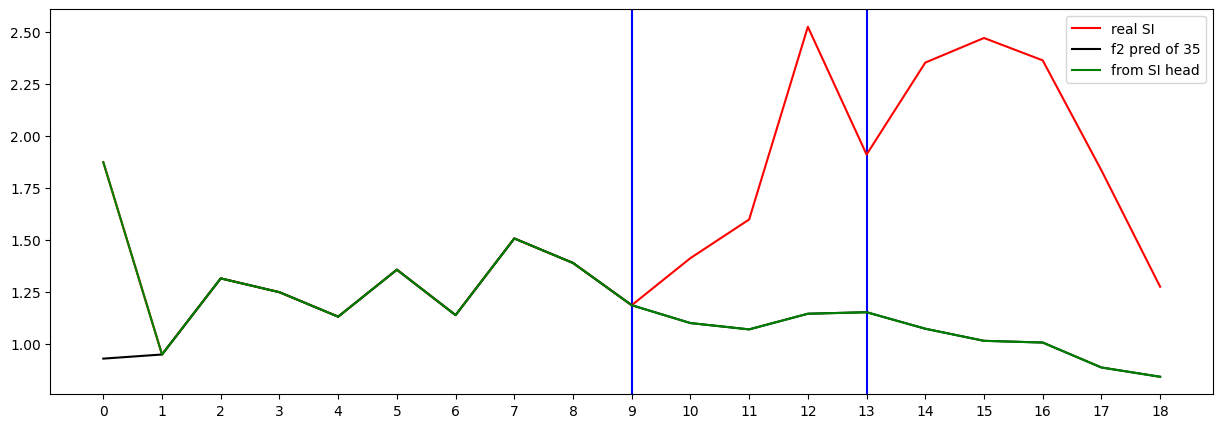

Testing R**2 - (all) - (no inputs):  0.724595965803716
Testing R**2 - (f2) - SI full (no inputs):  -5.767297013030225
Testing R**2 - SI head only (no inputs):  -5.767297013030225
0 ...index R**2 (no inputs):  -0.11157160632292262
1 ...index R**2 (no inputs):  -2.6348203677084387
2 ...index R**2 (no inputs):  -5.767297013030225
3 ...index R**2 (no inputs):  -0.1704251085274513
4 ...index R**2 (no inputs):  0.033147052798875865
5 ...index R**2 (no inputs):  -0.4090713521907412
6 ...index R**2 (no inputs):  -1.2607026281255518
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.31501488224405017
10 ...index R**2 (no inputs):  -0.8478125791266335
11 ...index R**2 (no inputs):  -0.1276243175415841
12 ...index R**2 (no inputs):  -1.2500214565421013
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.1178565671543621
16 ...index R**2 (no inputs):  -0.6544358315975962
17 ...index R**2 (no input

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.086953
Loss_SI: 1.090246319770813 Loss_all: 1.0712411403656006
===


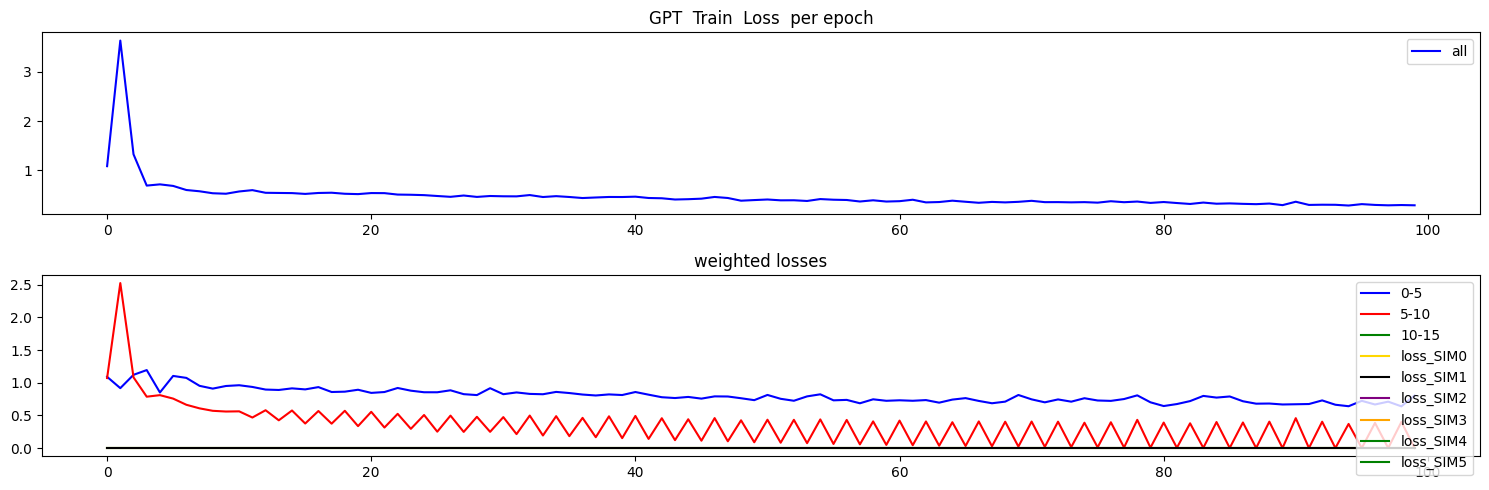

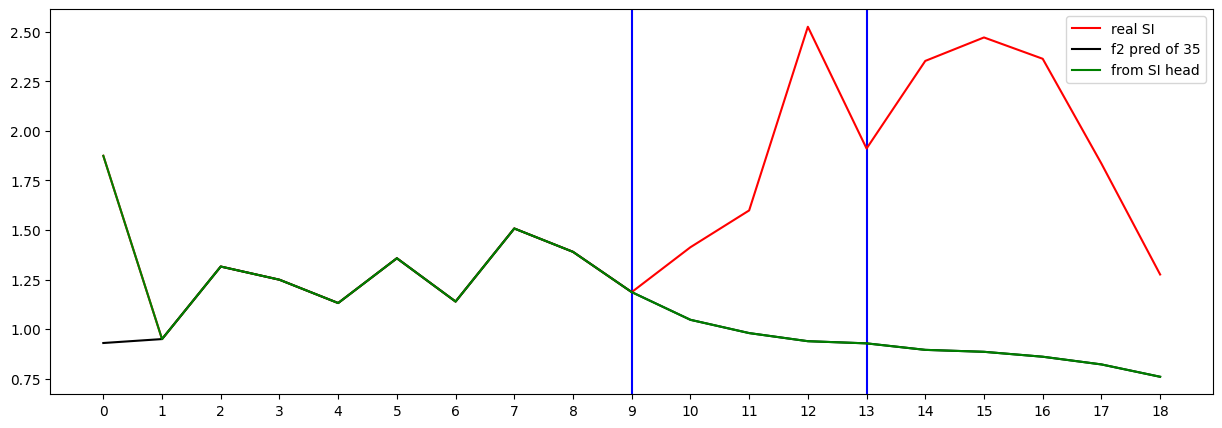

Testing R**2 - (all) - (no inputs):  0.7967670973555845
Testing R**2 - (f2) - SI full (no inputs):  -7.564548406923512
Testing R**2 - SI head only (no inputs):  -7.564548406923512
0 ...index R**2 (no inputs):  -0.08367600064277747
1 ...index R**2 (no inputs):  -2.368693161391896
2 ...index R**2 (no inputs):  -7.564548406923512
3 ...index R**2 (no inputs):  -16.434660871494998
4 ...index R**2 (no inputs):  -15.01102568987751
5 ...index R**2 (no inputs):  -0.03664590327070849
6 ...index R**2 (no inputs):  -2.520035668333626
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.23634785716444373
10 ...index R**2 (no inputs):  -0.7639700907603215
11 ...index R**2 (no inputs):  0.13536029864762644
12 ...index R**2 (no inputs):  -1.2500231729274955
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7420372273859697
16 ...index R**2 (no inputs):  -0.8182362721132901
17 ...index R**2 (no inputs)

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.165039
Loss_SI: 1.1244561672210693 Loss_all: 1.2033653259277344
===


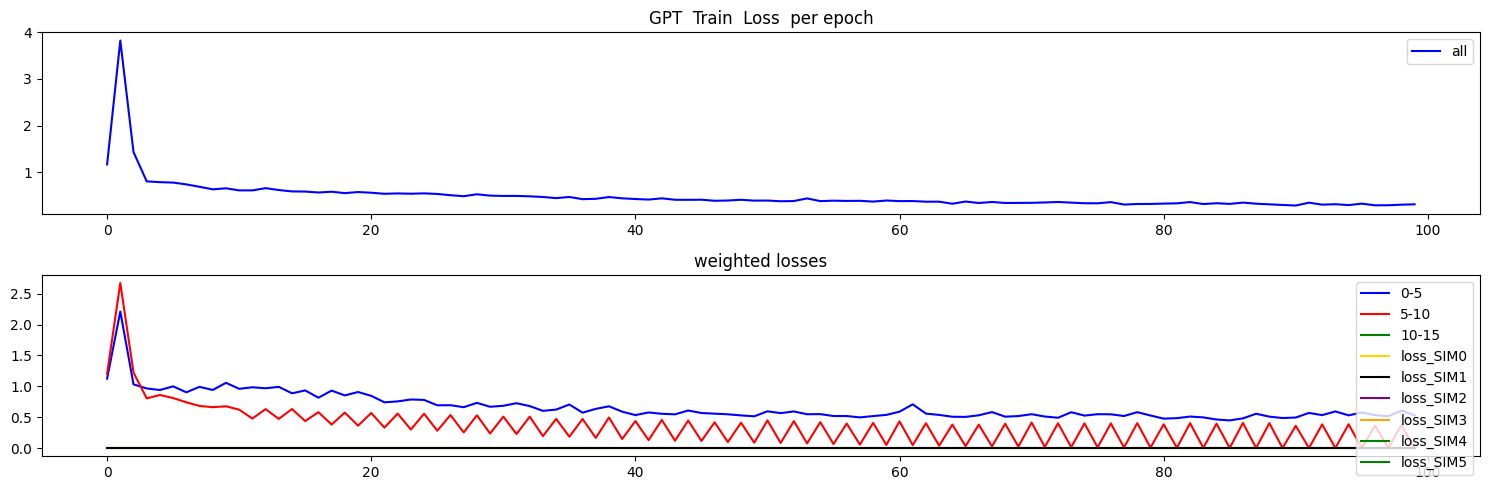

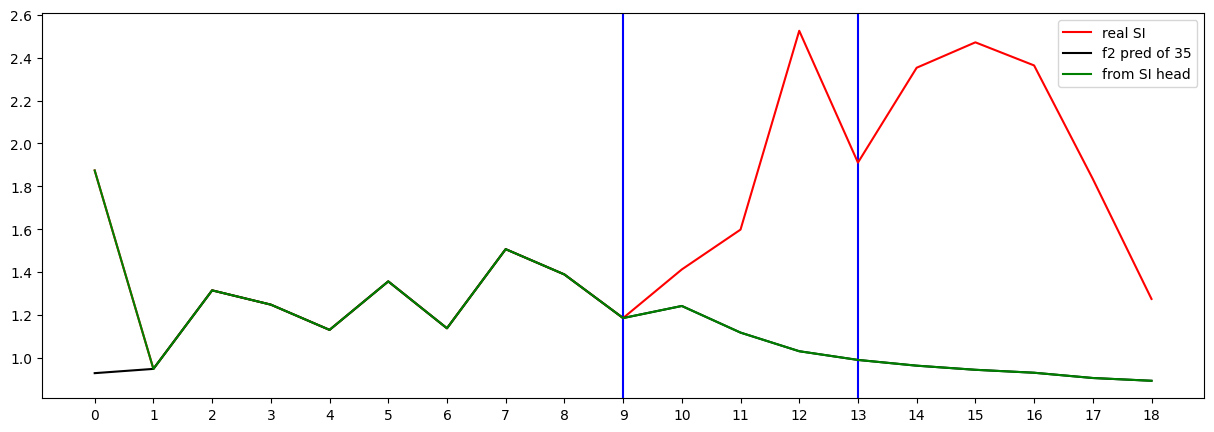

Testing R**2 - (all) - (no inputs):  0.8334623077295866
Testing R**2 - (f2) - SI full (no inputs):  -6.34671893287411
Testing R**2 - SI head only (no inputs):  -6.34671893287411
0 ...index R**2 (no inputs):  -0.22292616126096587
1 ...index R**2 (no inputs):  -3.6086402322300586
2 ...index R**2 (no inputs):  -6.34671893287411
3 ...index R**2 (no inputs):  0.07307928327224333
4 ...index R**2 (no inputs):  -0.35820555852243263
5 ...index R**2 (no inputs):  0.15139961035227634
6 ...index R**2 (no inputs):  -0.09695992426632527
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08272577862229613
10 ...index R**2 (no inputs):  -0.11187872988399938
11 ...index R**2 (no inputs):  0.5141403123036226
12 ...index R**2 (no inputs):  -0.8872137350928775
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3456757841725455
16 ...index R**2 (no inputs):  -1.7349708814202804
17 ...index R**2 (no inputs

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.231054
Loss_SI: 1.5099763870239258 Loss_all: 1.244490385055542
===


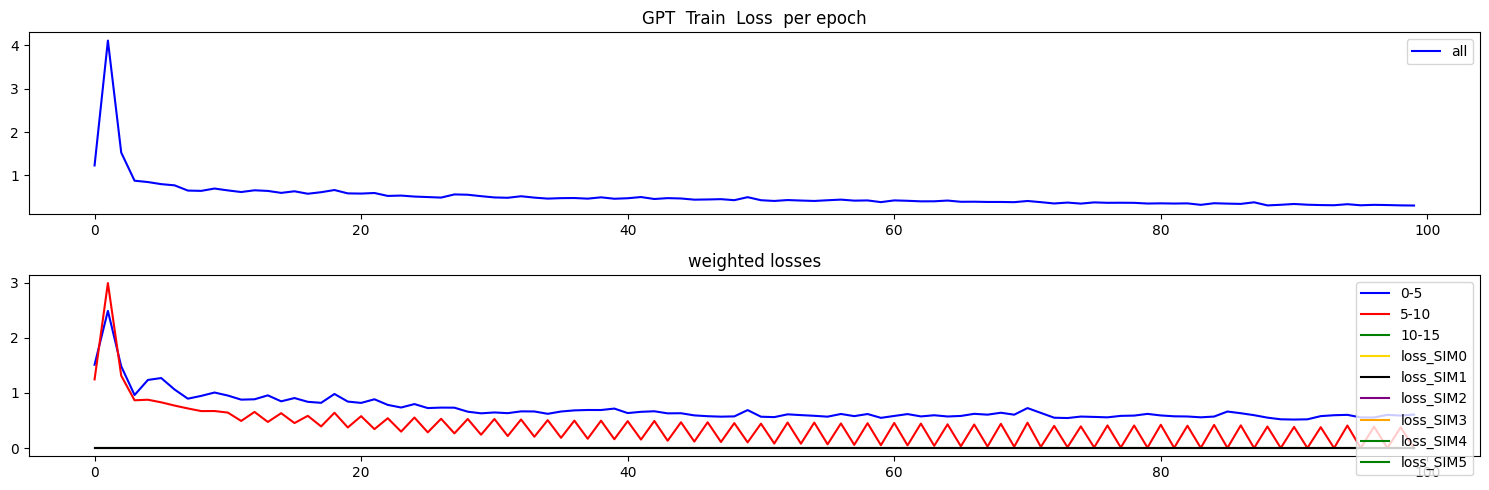

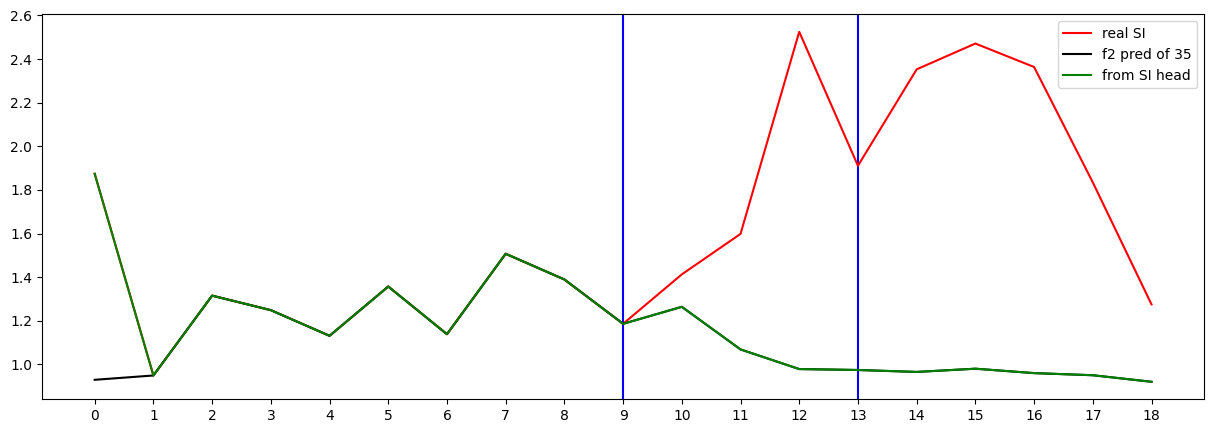

Testing R**2 - (all) - (no inputs):  0.8143621184799343
Testing R**2 - (f2) - SI full (no inputs):  -6.369396009795476
Testing R**2 - SI head only (no inputs):  -6.369396009795476
0 ...index R**2 (no inputs):  -0.14159491588310202
1 ...index R**2 (no inputs):  -3.85749550043323
2 ...index R**2 (no inputs):  -6.369396009795476
3 ...index R**2 (no inputs):  -0.027981963029064527
4 ...index R**2 (no inputs):  -0.05010250181378351
5 ...index R**2 (no inputs):  0.05295085483863815
6 ...index R**2 (no inputs):  -1.5643376772160367
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09990420758956087
10 ...index R**2 (no inputs):  0.059699460853101405
11 ...index R**2 (no inputs):  0.19161046369699175
12 ...index R**2 (no inputs):  -0.5769125890345033
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3898204036463444
16 ...index R**2 (no inputs):  -0.8991148320126341
17 ...index R**2 (no inp

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.228603
Loss_SI: 1.1575502157211304 Loss_all: 1.2315678596496582
===


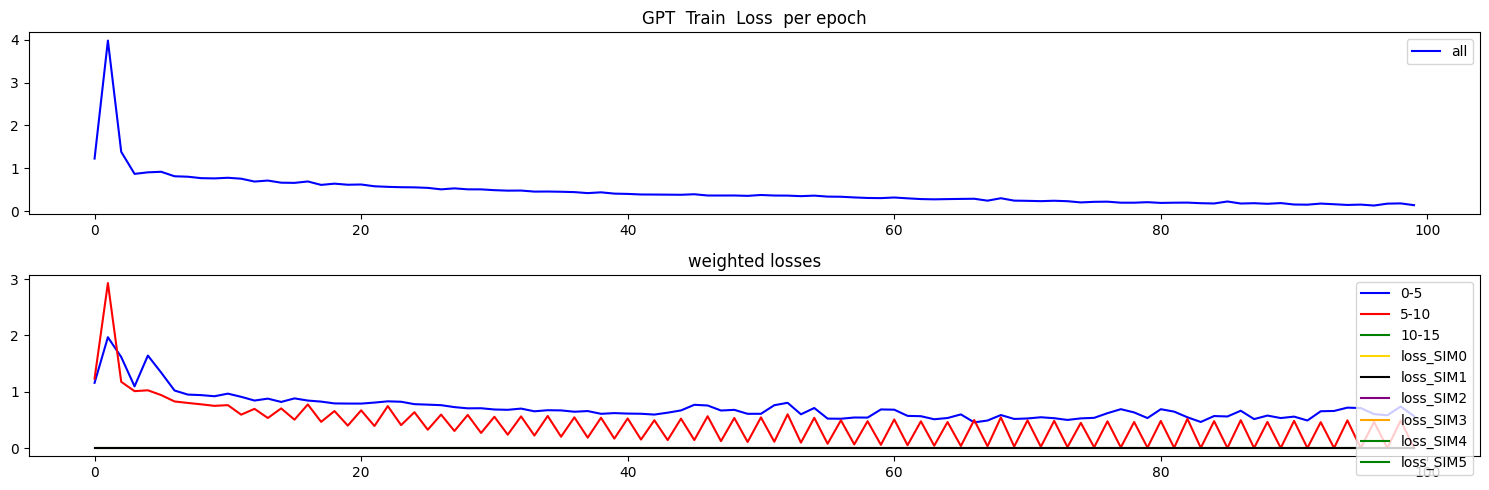

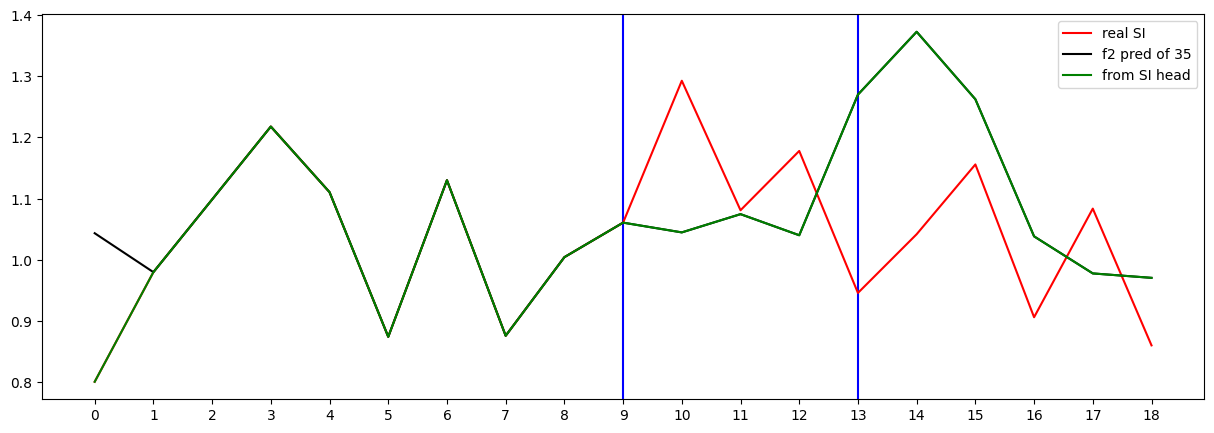

Testing R**2 - (all) - (no inputs):  0.9876477970574223
Testing R**2 - (f2) - SI full (no inputs):  -1.0538716080692239
Testing R**2 - SI head only (no inputs):  -1.0538716080692239
0 ...index R**2 (no inputs):  -0.37730447593947725
1 ...index R**2 (no inputs):  0.021056830264723603
2 ...index R**2 (no inputs):  -1.0538716080692239
3 ...index R**2 (no inputs):  -1.9385320240873103
4 ...index R**2 (no inputs):  -156.68358845547374
5 ...index R**2 (no inputs):  -1.414392445549249
6 ...index R**2 (no inputs):  -66.51022723984539
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -5.504764467975418
10 ...index R**2 (no inputs):  -3.370223661837353
11 ...index R**2 (no inputs):  -4.768426499315779
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5153183120582412
16 ...index R**2 (no inputs):  -4.756842169861591
17 ...index R**2 (no inputs):  -3.67152532113

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.162899
Loss_SI: 1.3566038608551025 Loss_all: 1.2708280086517334
===


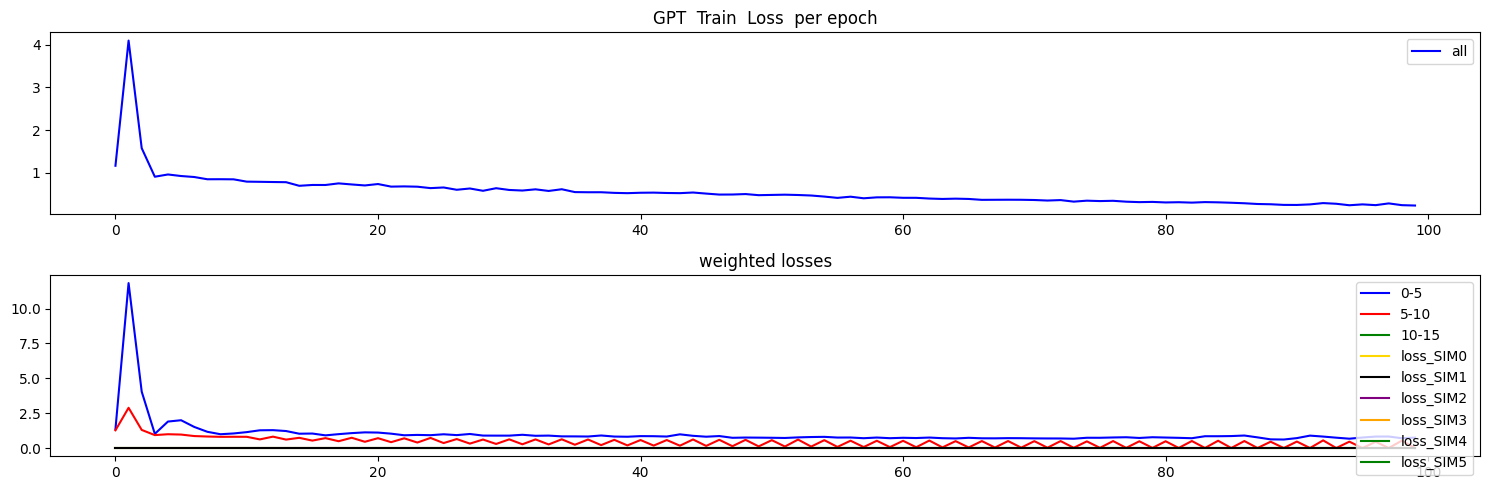

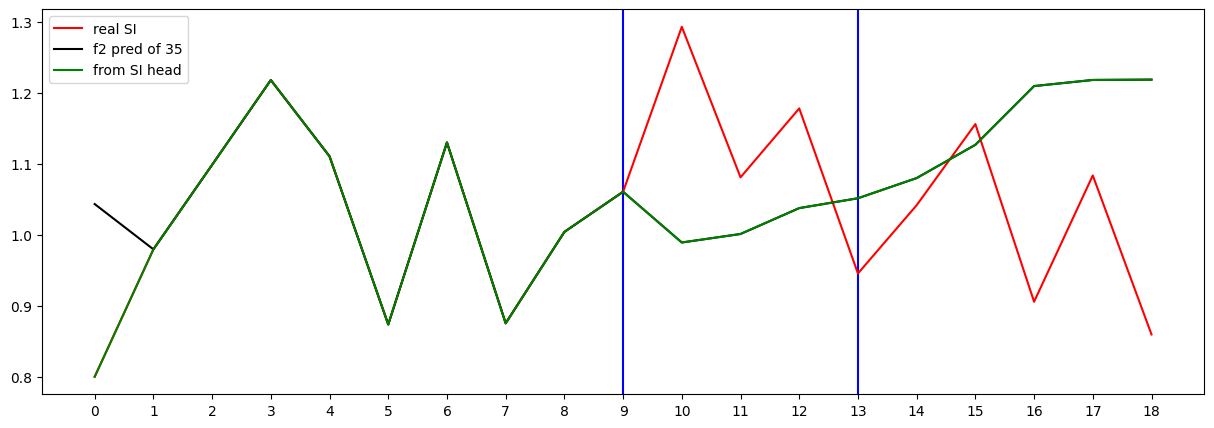

Testing R**2 - (all) - (no inputs):  0.9762020304758581
Testing R**2 - (f2) - SI full (no inputs):  -1.9634699629819696
Testing R**2 - SI head only (no inputs):  -1.9634699629819696
0 ...index R**2 (no inputs):  -0.24013642929040557
1 ...index R**2 (no inputs):  -0.9554874715195374
2 ...index R**2 (no inputs):  -1.9634699629819696
3 ...index R**2 (no inputs):  -0.20329137055646873
4 ...index R**2 (no inputs):  -8.250640628273741
5 ...index R**2 (no inputs):  -3.9198664309096873
6 ...index R**2 (no inputs):  -0.11814749424099302
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.4705562534844403
10 ...index R**2 (no inputs):  -1.060523180852352
11 ...index R**2 (no inputs):  0.33865786642215556
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.5907604879612625
16 ...index R**2 (no inputs):  -0.8358564262739252
17 ...index R**2 (no inputs):  -6.509804

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.398768
Loss_SI: 1.6280409097671509 Loss_all: 1.2862051725387573
===


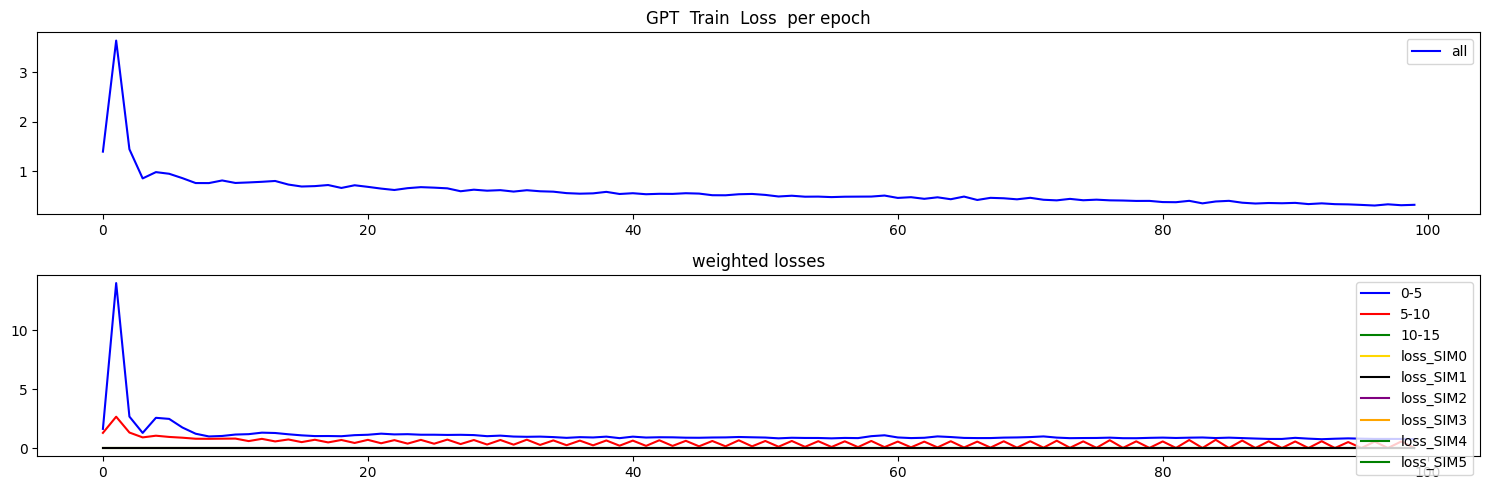

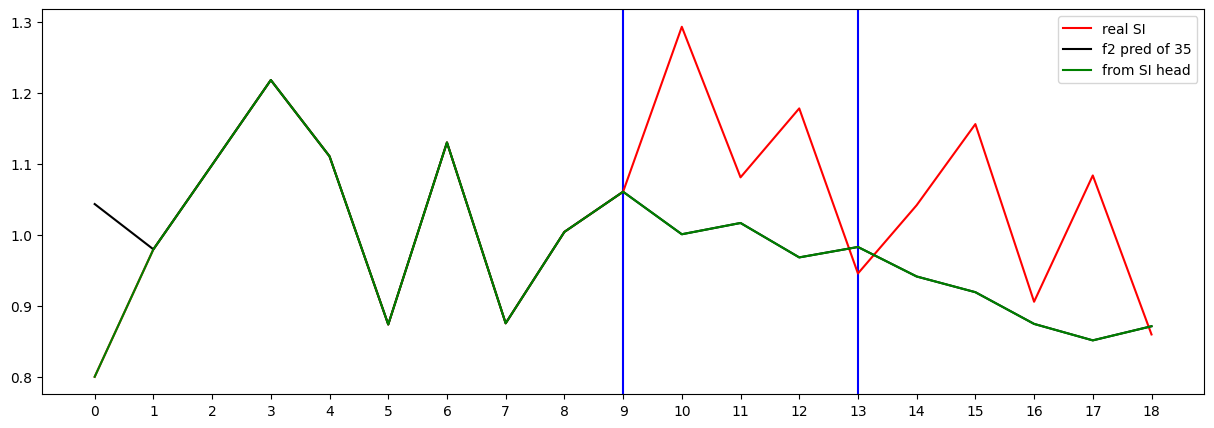

Testing R**2 - (all) - (no inputs):  0.9669892257477152
Testing R**2 - (f2) - SI full (no inputs):  0.07709212947245114
Testing R**2 - SI head only (no inputs):  0.07709212947245114
0 ...index R**2 (no inputs):  -0.03365090868934062
1 ...index R**2 (no inputs):  -0.5284221516429954
2 ...index R**2 (no inputs):  0.07709212947245114
3 ...index R**2 (no inputs):  0.033288239116999185
4 ...index R**2 (no inputs):  -2.1466037231127646
5 ...index R**2 (no inputs):  -5.831392807859911
6 ...index R**2 (no inputs):  -1.5649608896059828
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.468902291621327
10 ...index R**2 (no inputs):  -0.46391409088085855
11 ...index R**2 (no inputs):  -217.6359804431826
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.16970933973274915
16 ...index R**2 (no inputs):  -0.9438167831640429
17 ...index R**2 (no inputs):  -29.97543

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.249465
Loss_SI: 1.2483148574829102 Loss_all: 1.2079341411590576
===


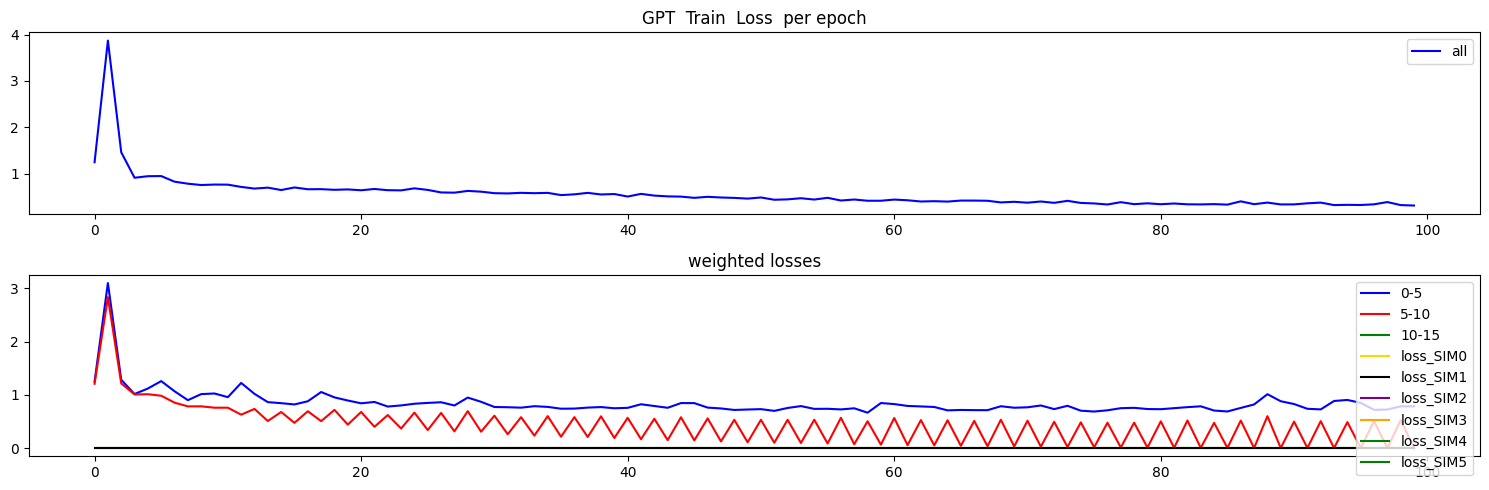

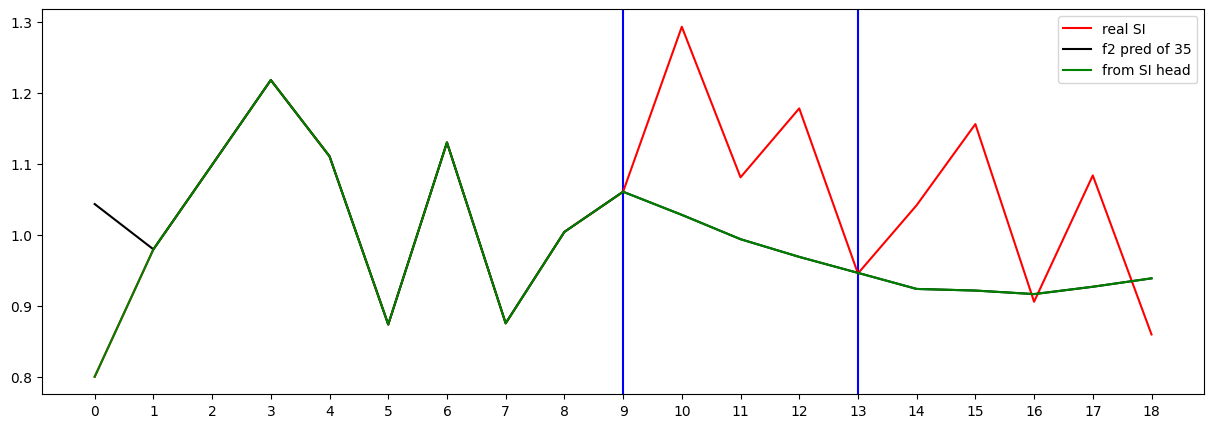

Testing R**2 - (all) - (no inputs):  0.9565309136254633
Testing R**2 - (f2) - SI full (no inputs):  -0.06757078039729159
Testing R**2 - SI head only (no inputs):  -0.06757078039729159
0 ...index R**2 (no inputs):  -0.07275540094107646
1 ...index R**2 (no inputs):  -0.05863920835631942
2 ...index R**2 (no inputs):  -0.06757078039729159
3 ...index R**2 (no inputs):  -0.456996360028183
4 ...index R**2 (no inputs):  -0.12350143724341955
5 ...index R**2 (no inputs):  -7.980852086349238
6 ...index R**2 (no inputs):  -0.3282090431509981
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6387004386018305
10 ...index R**2 (no inputs):  -0.10150170798041014
11 ...index R**2 (no inputs):  -289.7284153202709
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2038849775116125
16 ...index R**2 (no inputs):  -0.04187498746585061
17 ...index R**2 (no inputs):  -293.

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.269461
Loss_SI: 1.0805293321609497 Loss_all: 1.2318885326385498
===


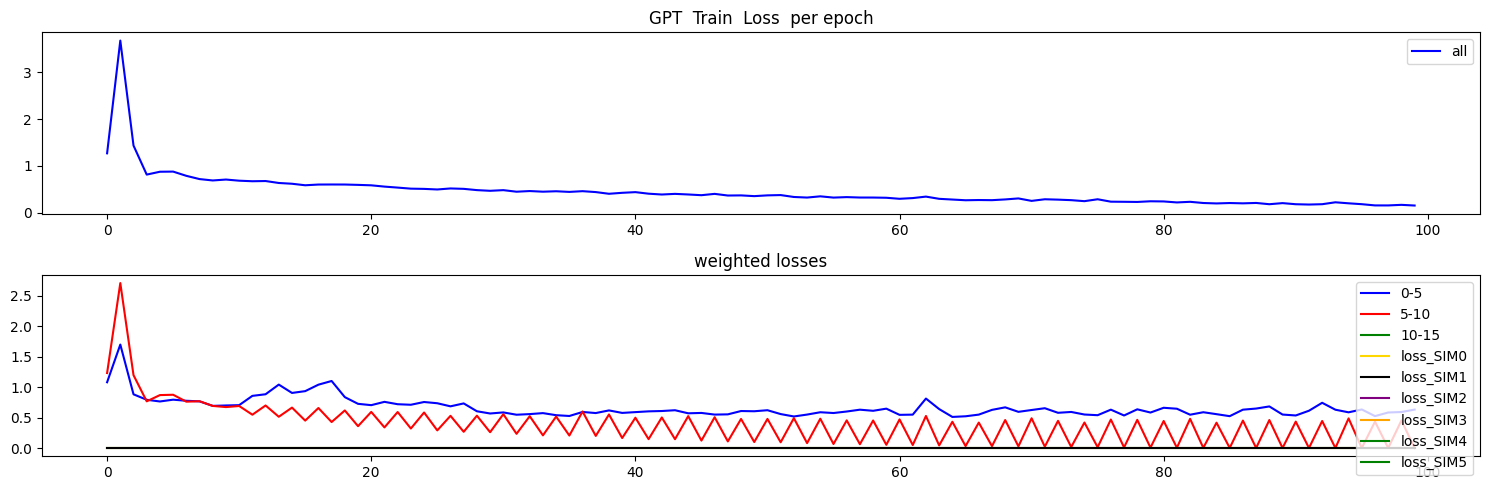

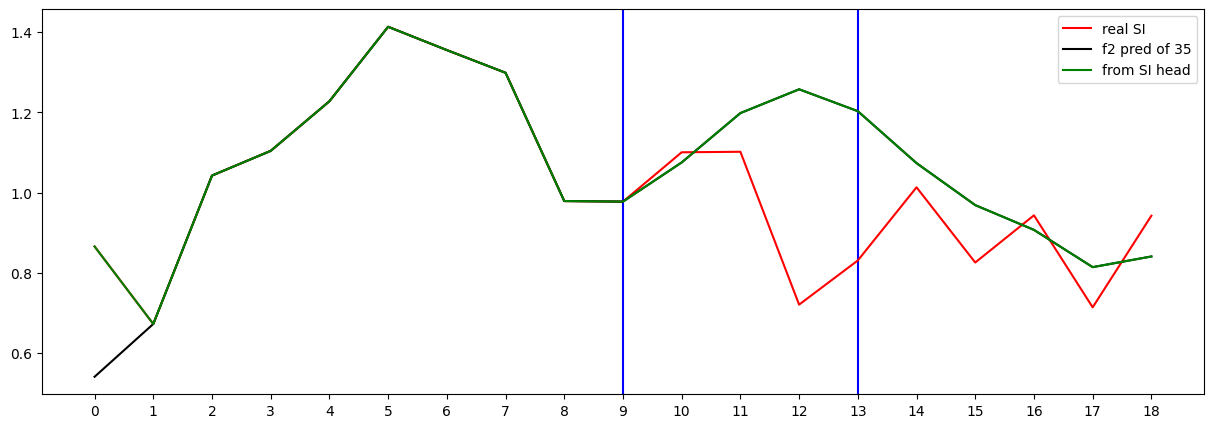

Testing R**2 - (all) - (no inputs):  0.9510041715785429
Testing R**2 - (f2) - SI full (no inputs):  -3.2290717195712695
Testing R**2 - SI head only (no inputs):  -3.2290717195712695
0 ...index R**2 (no inputs):  -0.196041667994179
1 ...index R**2 (no inputs):  -1.1849473632900107
2 ...index R**2 (no inputs):  -3.2290717195712695
3 ...index R**2 (no inputs):  -3.9772271445099117
4 ...index R**2 (no inputs):  -0.9635674109790502
5 ...index R**2 (no inputs):  -3.4054710884813177
6 ...index R**2 (no inputs):  -109.9334543115657
7 ...index R**2 (no inputs):  -312.8004505975874
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.26249158910916526
10 ...index R**2 (no inputs):  0.4201493198113726
11 ...index R**2 (no inputs):  -202.1158908552558
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.3036262590088192
16 ...index R**2 (no inputs):  -0.3352629679342354
17 ...index R**2 (no inputs):

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.315922
Loss_SI: 1.2644370794296265 Loss_all: 1.310516357421875
===


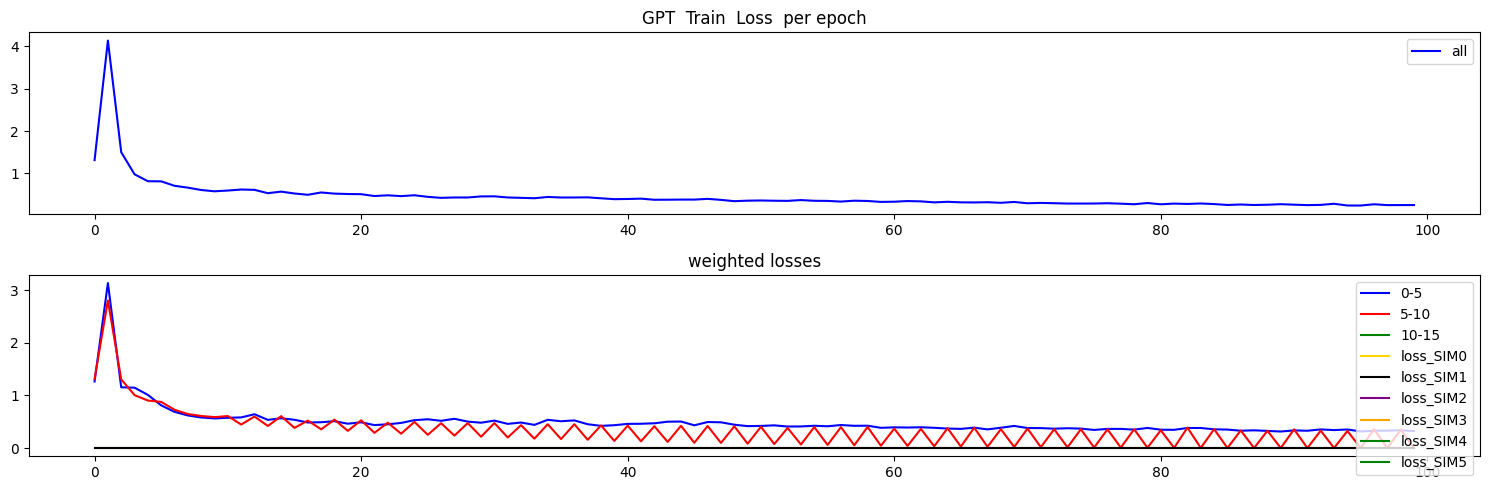

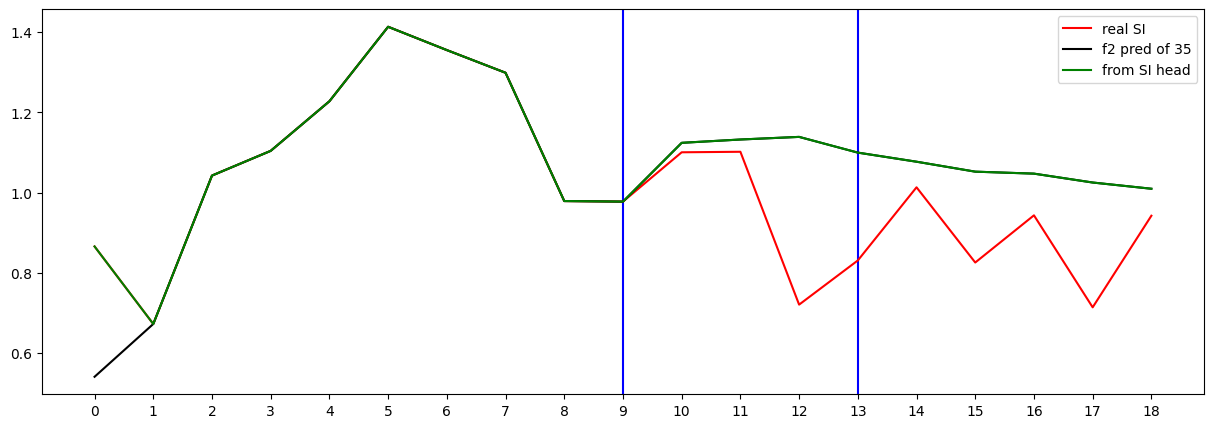

Testing R**2 - (all) - (no inputs):  0.9806036164397077
Testing R**2 - (f2) - SI full (no inputs):  -2.6492007664502144
Testing R**2 - SI head only (no inputs):  -2.6492007664502144
0 ...index R**2 (no inputs):  -0.08618556143760725
1 ...index R**2 (no inputs):  -0.462012782055909
2 ...index R**2 (no inputs):  -2.6492007664502144
3 ...index R**2 (no inputs):  -13.761132472359225
4 ...index R**2 (no inputs):  -12.285695913292317
5 ...index R**2 (no inputs):  -0.7548440250303972
6 ...index R**2 (no inputs):  -903.0164342334093
7 ...index R**2 (no inputs):  -2789.5133322810634
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.30255379399068505
10 ...index R**2 (no inputs):  -0.06951080963311607
11 ...index R**2 (no inputs):  -196.71886443665707
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9973073442341465
16 ...index R**2 (no inputs):  -0.07015764958422199
17 ...index R**2 (no in

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.293299
Loss_SI: 1.2570927143096924 Loss_all: 1.2812771797180176
===


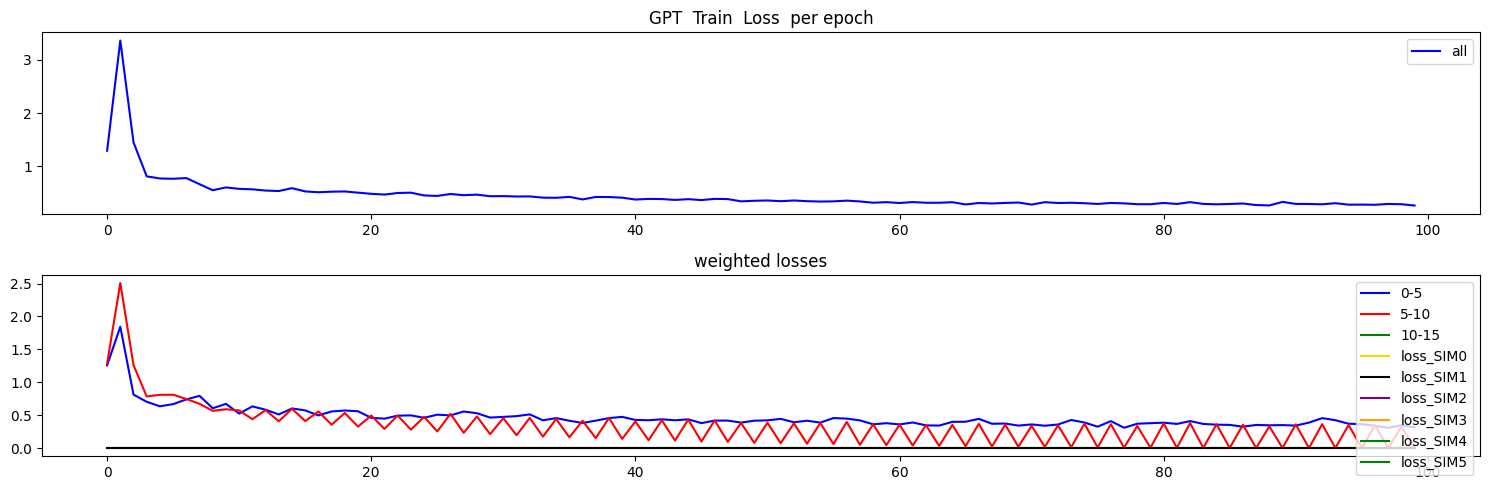

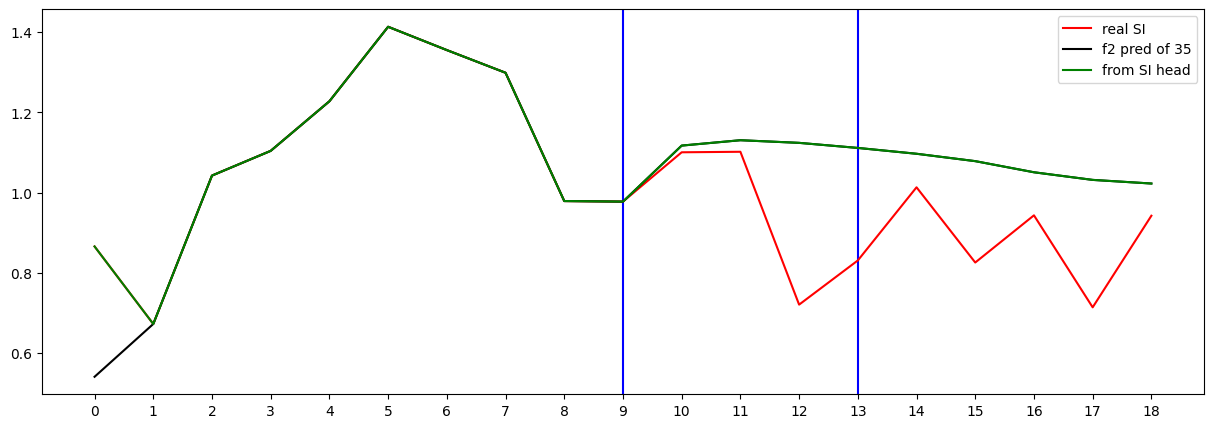

Testing R**2 - (all) - (no inputs):  0.9907591145697539
Testing R**2 - (f2) - SI full (no inputs):  -2.7660411211172464
Testing R**2 - SI head only (no inputs):  -2.7660411211172464
0 ...index R**2 (no inputs):  0.015535929866626441
1 ...index R**2 (no inputs):  -0.573424917242263
2 ...index R**2 (no inputs):  -2.7660411211172464
3 ...index R**2 (no inputs):  -12.201219319120177
4 ...index R**2 (no inputs):  -76.11485021224561
5 ...index R**2 (no inputs):  0.1908119286295572
6 ...index R**2 (no inputs):  -1090.2275520343023
7 ...index R**2 (no inputs):  -23621.54447121665
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11280366210644721
10 ...index R**2 (no inputs):  -0.069815037266308
11 ...index R**2 (no inputs):  -37.92850277503691
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.0365136763528353
16 ...index R**2 (no inputs):  -0.4049220222477554
17 ...index R**2 (no inputs):

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.241725
Loss_SI: 1.2199211120605469 Loss_all: 1.3211429119110107
===


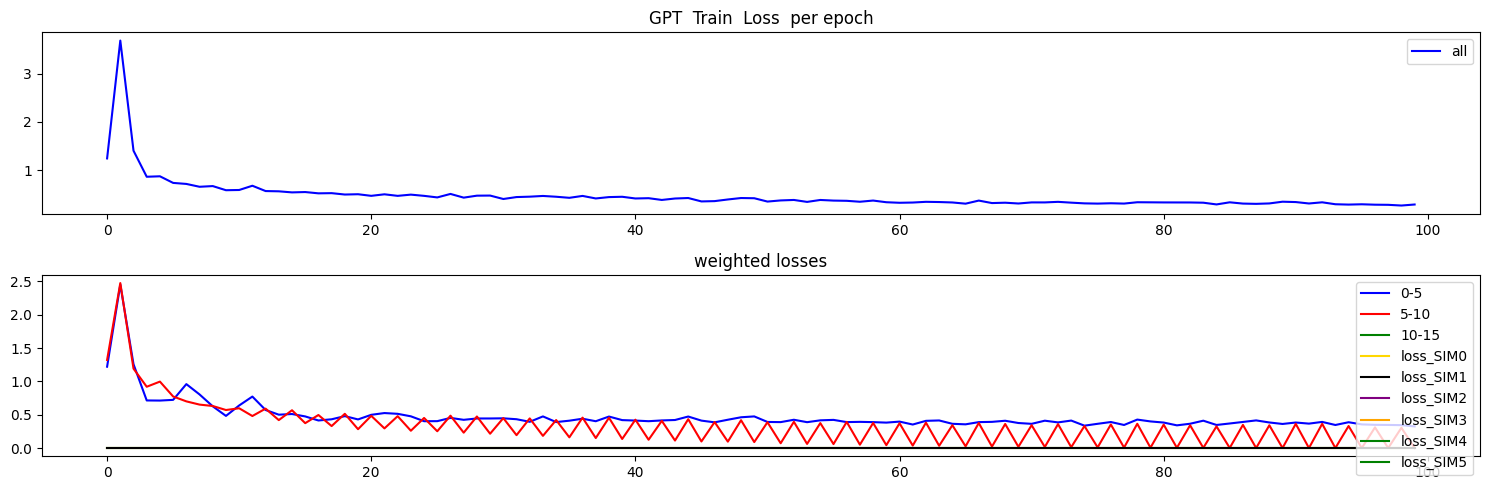

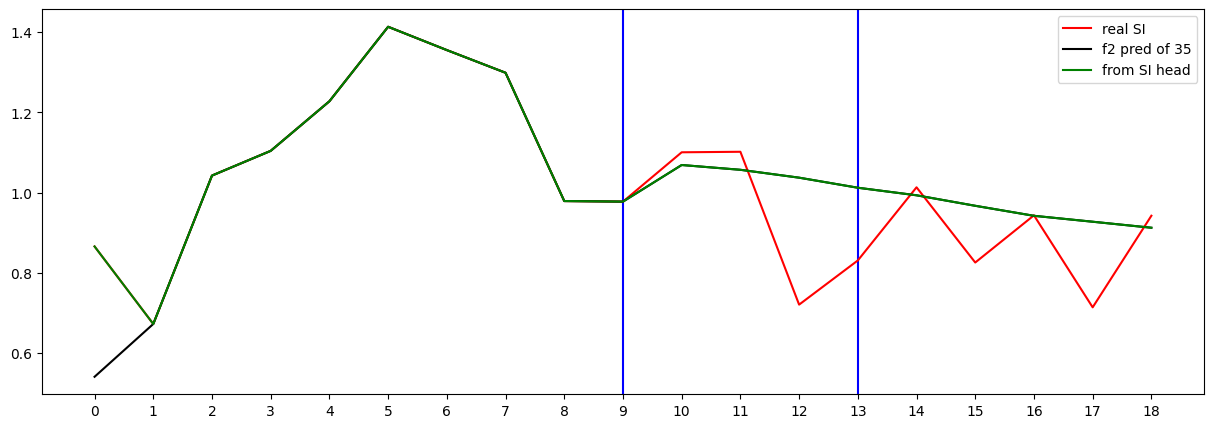

Testing R**2 - (all) - (no inputs):  0.9896326698131394
Testing R**2 - (f2) - SI full (no inputs):  -0.8005885733194664
Testing R**2 - SI head only (no inputs):  -0.8005885733194664
0 ...index R**2 (no inputs):  -0.023058520431513463
1 ...index R**2 (no inputs):  -0.22688979723401514
2 ...index R**2 (no inputs):  -0.8005885733194664
3 ...index R**2 (no inputs):  -14.543616309287067
4 ...index R**2 (no inputs):  -717.6671372232802
5 ...index R**2 (no inputs):  0.09959995144654499
6 ...index R**2 (no inputs):  -511.0688436173589
7 ...index R**2 (no inputs):  -26021.10388372781
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.03125166820483494
10 ...index R**2 (no inputs):  0.06405756385713224
11 ...index R**2 (no inputs):  -53.03454705325175
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7469282551291301
16 ...index R**2 (no inputs):  -0.35687807524308246
17 ...index R**2 (no inp

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.101491
Loss_SI: 1.2528806924819946 Loss_all: 1.1897729635238647
===


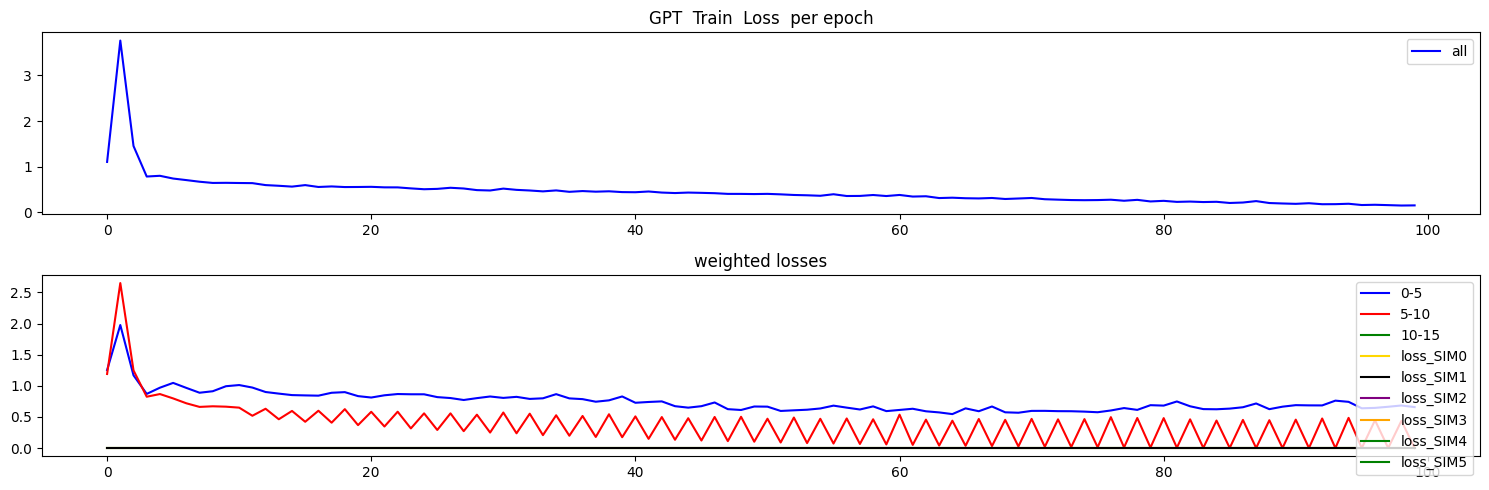

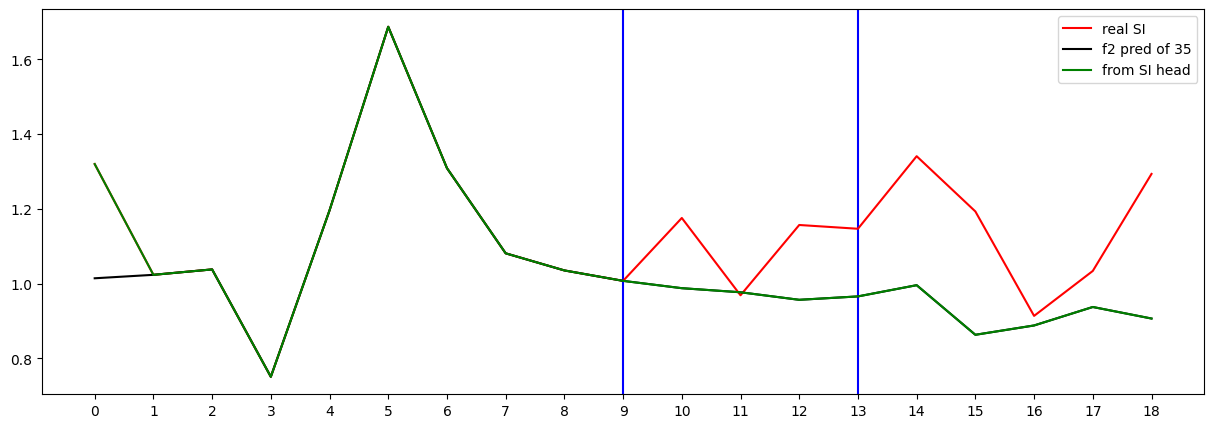

Testing R**2 - (all) - (no inputs):  0.9938461212836965
Testing R**2 - (f2) - SI full (no inputs):  -2.0004178358800337
Testing R**2 - SI head only (no inputs):  -2.0004178358800337
0 ...index R**2 (no inputs):  0.30588616189778983
1 ...index R**2 (no inputs):  0.06282759172021657
2 ...index R**2 (no inputs):  -2.0004178358800337
3 ...index R**2 (no inputs):  -397.2580975247388
4 ...index R**2 (no inputs):  -3.866867529265553
5 ...index R**2 (no inputs):  -0.20930377349365425
6 ...index R**2 (no inputs):  -1295.7696581240332
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07685797380846604
10 ...index R**2 (no inputs):  -0.3222876728747499
11 ...index R**2 (no inputs):  -51.50563002386138
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.105778823762454
16 ...index R**2 (no inputs):  -0.29799522550025803
17 ...index R**2 (no inputs):  -119.762194

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.050353
Loss_SI: 1.0462030172348022 Loss_all: 1.1153455972671509
===


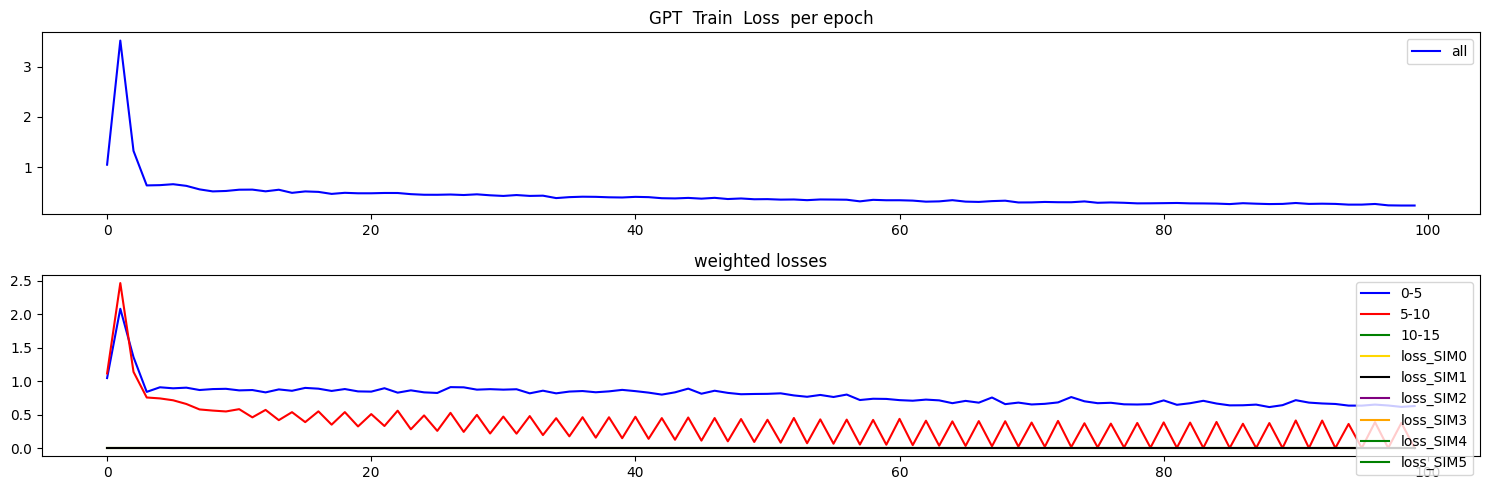

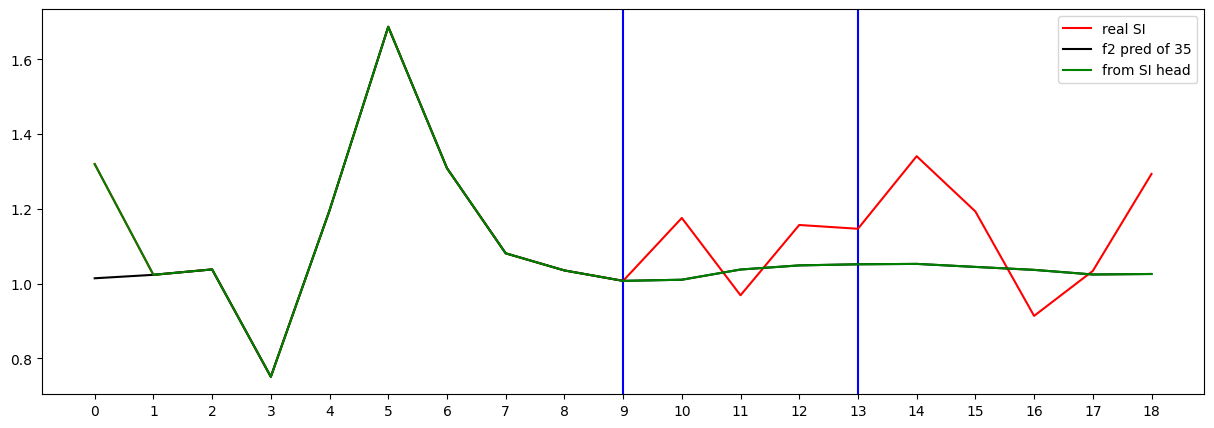

Testing R**2 - (all) - (no inputs):  0.9941129377651192
Testing R**2 - (f2) - SI full (no inputs):  -0.605505451170234
Testing R**2 - SI head only (no inputs):  -0.605505451170234
0 ...index R**2 (no inputs):  -0.06291010940070518
1 ...index R**2 (no inputs):  0.08793361207568617
2 ...index R**2 (no inputs):  -0.605505451170234
3 ...index R**2 (no inputs):  -28595.388045873737
4 ...index R**2 (no inputs):  -1.7990795597113514
5 ...index R**2 (no inputs):  -0.15826286959643676
6 ...index R**2 (no inputs):  -175.87988221066587
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.012330506568731359
10 ...index R**2 (no inputs):  -0.06554800176000009
11 ...index R**2 (no inputs):  -15.211970392047917
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.5252013423216297
16 ...index R**2 (no inputs):  0.08573584356695063
17 ...index R**2 (no inputs):  -72.3859

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.207233
Loss_SI: 2.0924878120422363 Loss_all: 1.2165502309799194
===


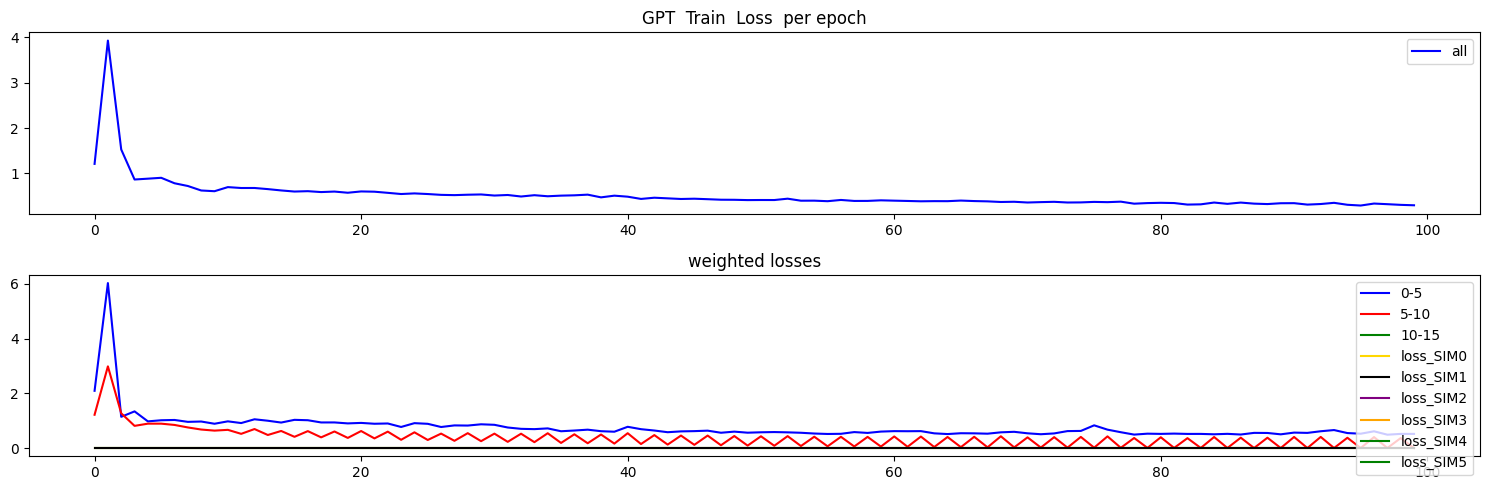

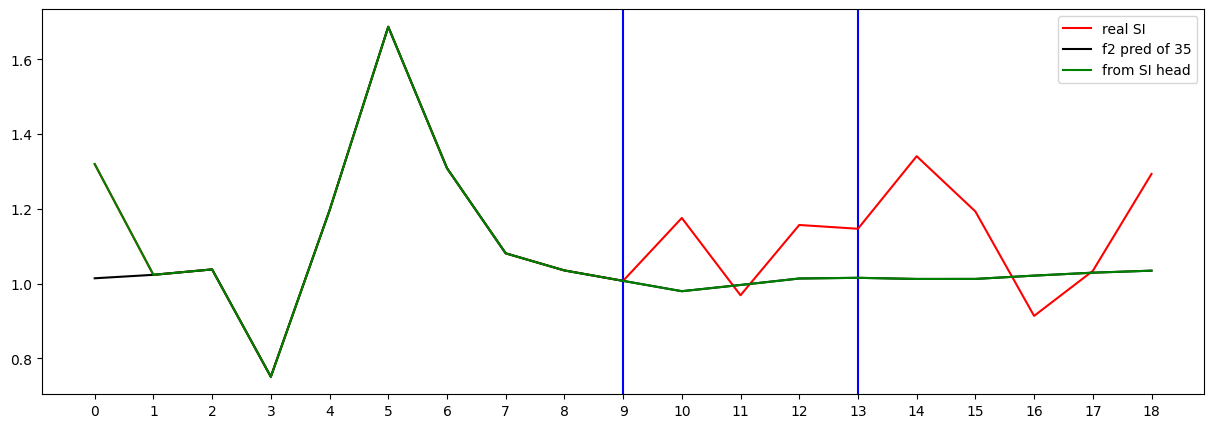

Testing R**2 - (all) - (no inputs):  0.9929638013492116
Testing R**2 - (f2) - SI full (no inputs):  -0.8068175236434161
Testing R**2 - SI head only (no inputs):  -0.8068175236434161
0 ...index R**2 (no inputs):  -0.03128594846378241
1 ...index R**2 (no inputs):  0.09784217902433323
2 ...index R**2 (no inputs):  -0.8068175236434161
3 ...index R**2 (no inputs):  -25104.523861389946
4 ...index R**2 (no inputs):  -8.245217238157156
5 ...index R**2 (no inputs):  -0.3821060218690546
6 ...index R**2 (no inputs):  -478.9727225378761
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.060468694193418715
10 ...index R**2 (no inputs):  -0.05168820555440168
11 ...index R**2 (no inputs):  -10.672859381258721
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.48333316527598535
16 ...index R**2 (no inputs):  0.11005799466930943
17 ...index R**2 (no inputs):  -32.335

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.276695
Loss_SI: 1.3528118133544922 Loss_all: 1.2676223516464233
===


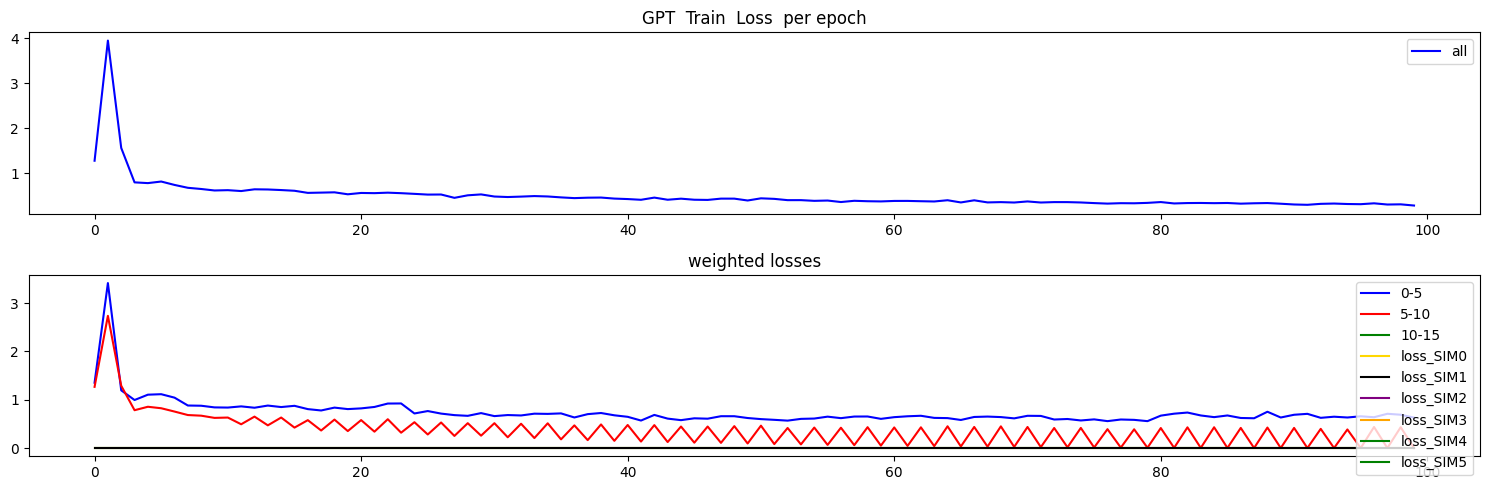

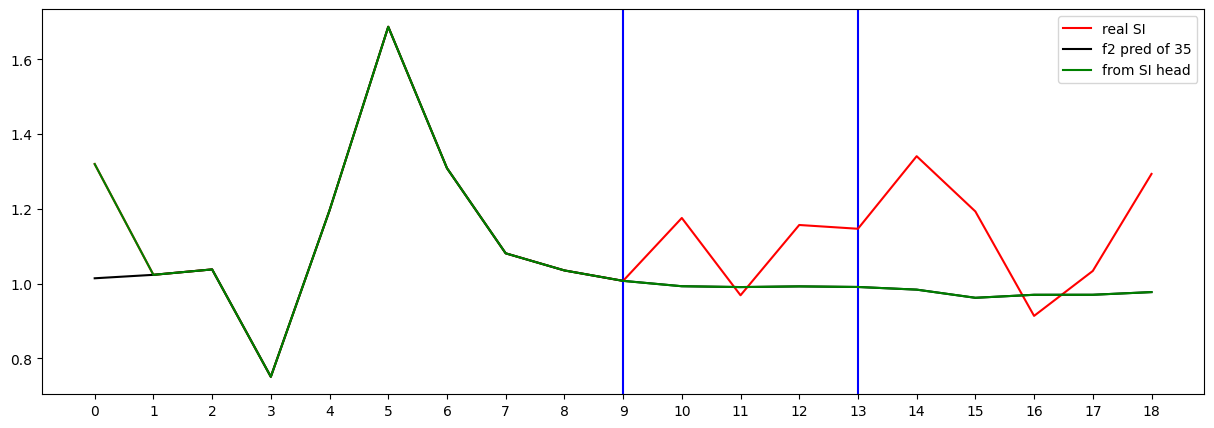

Testing R**2 - (all) - (no inputs):  0.9945852970516176
Testing R**2 - (f2) - SI full (no inputs):  -1.350325031740113
Testing R**2 - SI head only (no inputs):  -1.350325031740113
0 ...index R**2 (no inputs):  -0.02685702120616651
1 ...index R**2 (no inputs):  0.09768977484631425
2 ...index R**2 (no inputs):  -1.350325031740113
3 ...index R**2 (no inputs):  -26277.738227616846
4 ...index R**2 (no inputs):  -3.6380315372165457
5 ...index R**2 (no inputs):  -0.0662440592485185
6 ...index R**2 (no inputs):  -221.7199413661125
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.017460152160289732
10 ...index R**2 (no inputs):  -0.08487170342293049
11 ...index R**2 (no inputs):  -33.14724132638039
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.3074423062757211
16 ...index R**2 (no inputs):  0.09531489019657513
17 ...index R**2 (no inputs):  -36.37005823

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.191649
Loss_SI: 1.0528291463851929 Loss_all: 1.097488522529602
===


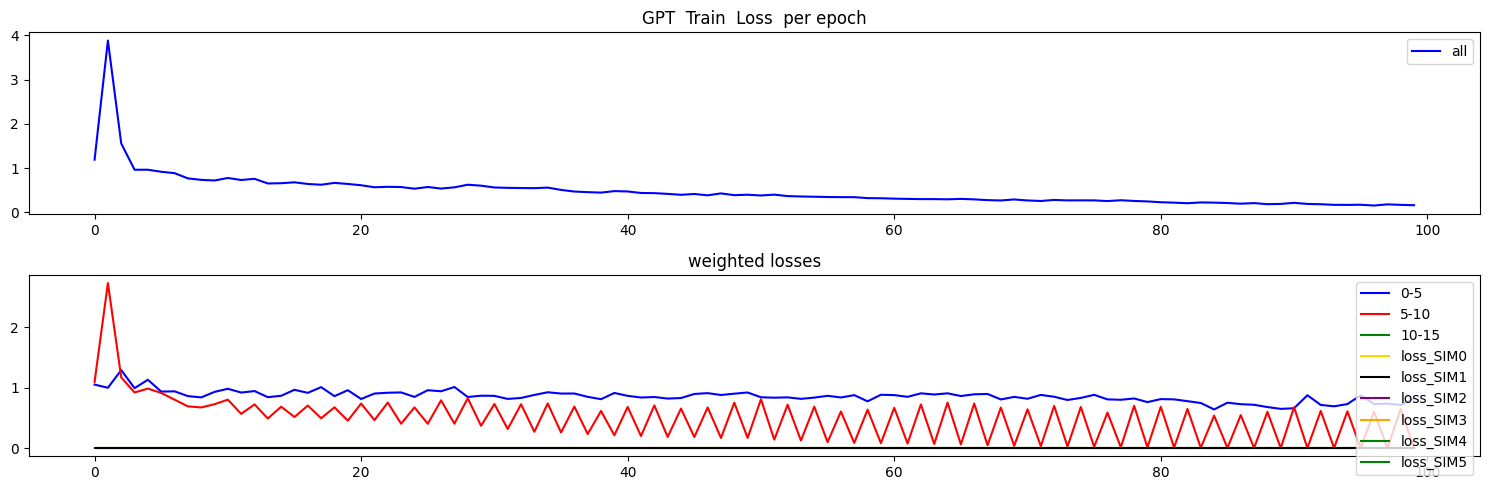

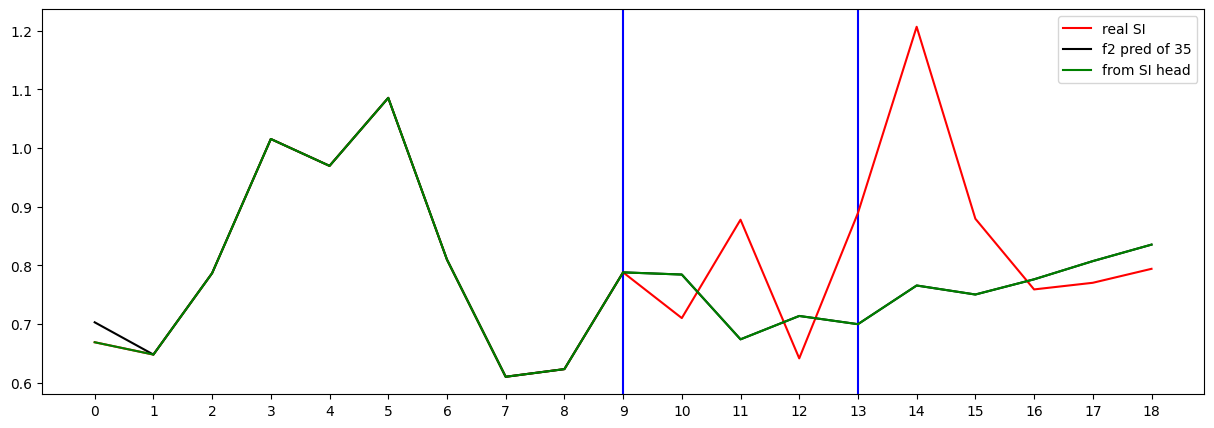

Testing R**2 - (all) - (no inputs):  0.9832494431321991
Testing R**2 - (f2) - SI full (no inputs):  -0.5283559112828584
Testing R**2 - SI head only (no inputs):  -0.5283559112828584
0 ...index R**2 (no inputs):  -0.0734796288871542
1 ...index R**2 (no inputs):  -0.24057931598491988
2 ...index R**2 (no inputs):  -0.5283559112828584
3 ...index R**2 (no inputs):  -2.1498322207273888
4 ...index R**2 (no inputs):  -13.165631497221067
5 ...index R**2 (no inputs):  -3.4050475283209893
6 ...index R**2 (no inputs):  -43.63366639586583
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09763881475688052
10 ...index R**2 (no inputs):  -0.2730883211711159
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.05891059694948786
16 ...index R**2 (no inputs):  -2.067853453872302
17 ...index R**2 (no inputs):  -92.21810670522014
18 ...i

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.393460
Loss_SI: 1.4569768905639648 Loss_all: 1.2759658098220825
===


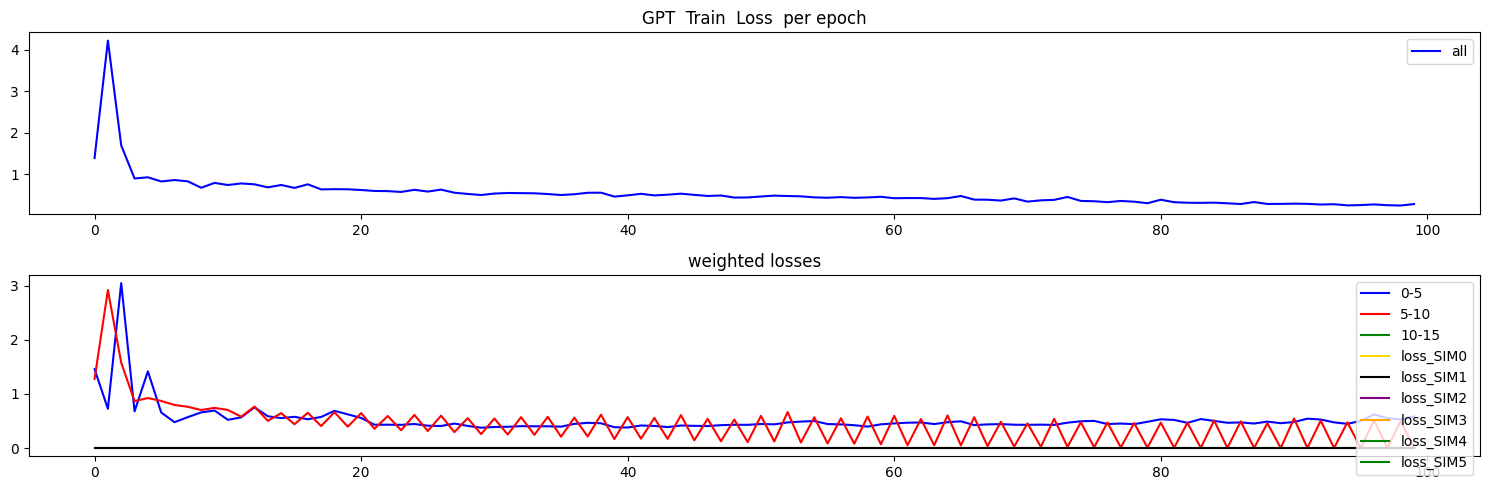

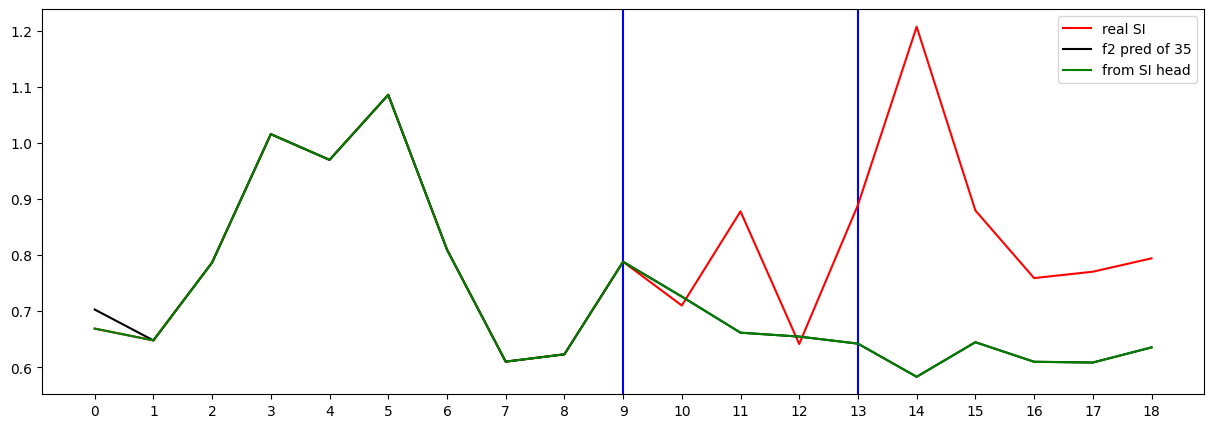

Testing R**2 - (all) - (no inputs):  0.9772378381595016
Testing R**2 - (f2) - SI full (no inputs):  -1.5253558189264944
Testing R**2 - SI head only (no inputs):  -1.5253558189264944
0 ...index R**2 (no inputs):  -0.06680465993098306
1 ...index R**2 (no inputs):  -5.40863565796573
2 ...index R**2 (no inputs):  -1.5253558189264944
3 ...index R**2 (no inputs):  -0.11593778325244952
4 ...index R**2 (no inputs):  -909.1501275819599
5 ...index R**2 (no inputs):  -4.983547056589098
6 ...index R**2 (no inputs):  -8446.106029827355
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14747808525807726
10 ...index R**2 (no inputs):  0.2841875068283166
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.238805087998113
16 ...index R**2 (no inputs):  -0.7203694019229077
17 ...index R**2 (no inputs):  -18.72543024607644
18 ...index

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.486699
Loss_SI: 1.6942108869552612 Loss_all: 1.3545057773590088
===


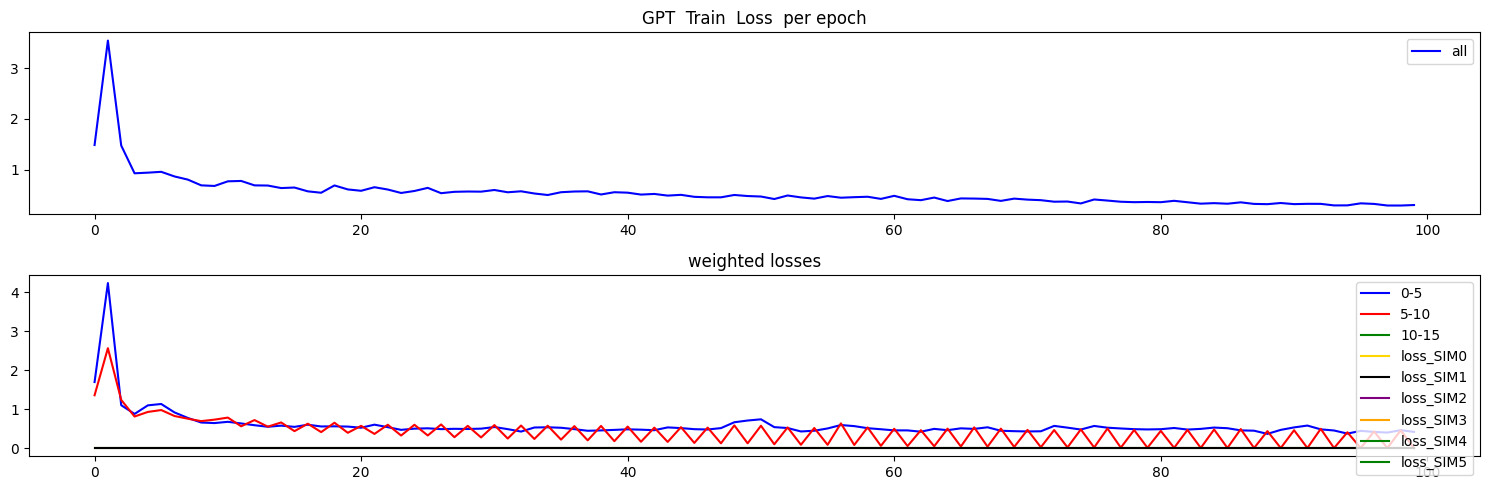

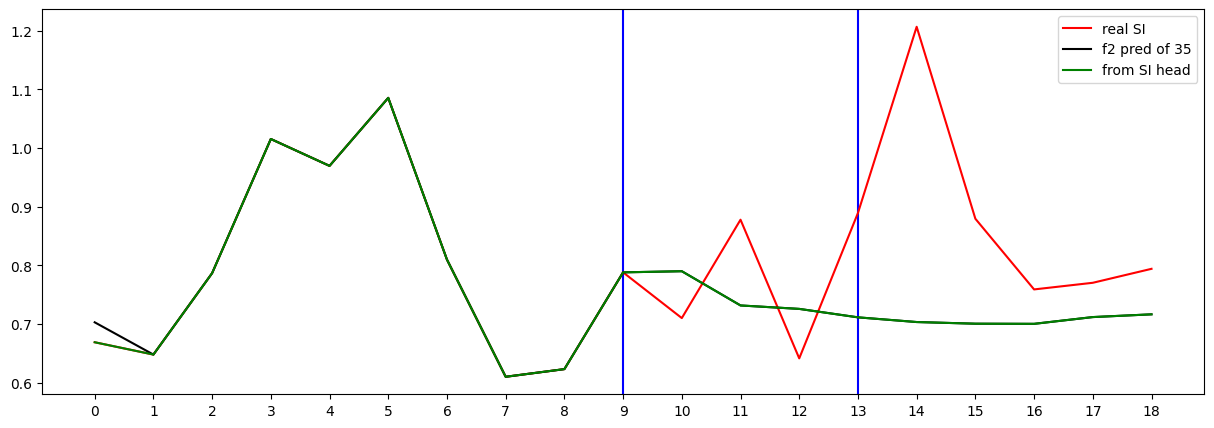

Testing R**2 - (all) - (no inputs):  0.9787538681322647
Testing R**2 - (f2) - SI full (no inputs):  -0.5180307133798678
Testing R**2 - SI head only (no inputs):  -0.5180307133798678
0 ...index R**2 (no inputs):  0.0080977542908367
1 ...index R**2 (no inputs):  -0.19149443210997807
2 ...index R**2 (no inputs):  -0.5180307133798678
3 ...index R**2 (no inputs):  -0.6910979640497072
4 ...index R**2 (no inputs):  -20.31160326474953
5 ...index R**2 (no inputs):  -4.5884746037252935
6 ...index R**2 (no inputs):  -323.65801845145046
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.23608833580849753
10 ...index R**2 (no inputs):  -0.053898491327591724
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.240133699092913
16 ...index R**2 (no inputs):  -0.2547768931433141
17 ...index R**2 (no inputs):  -30.80614542970278
18 ...

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.290956
Loss_SI: 1.1269750595092773 Loss_all: 1.2071443796157837
===


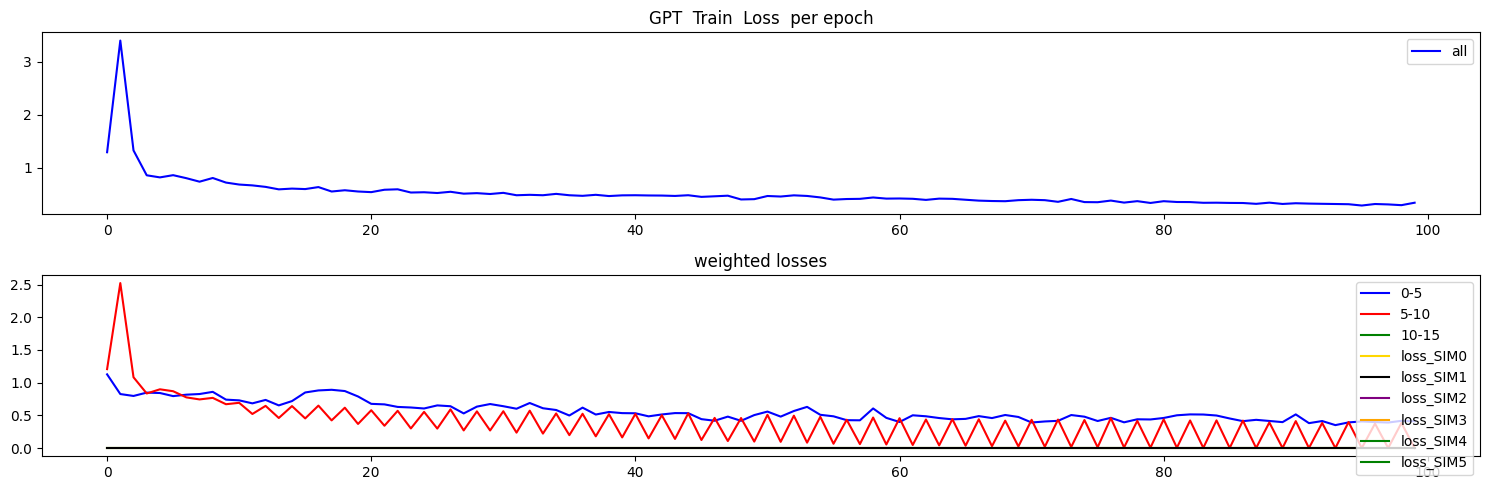

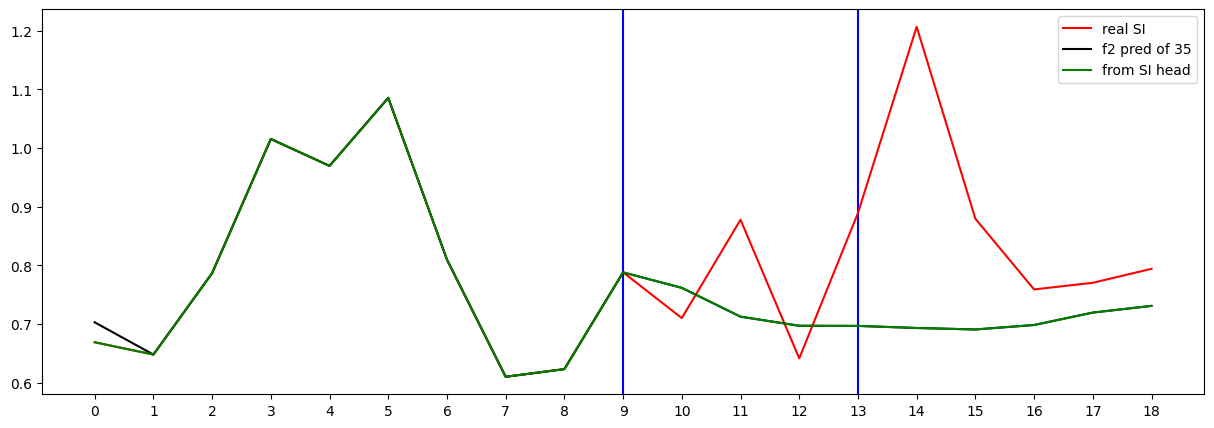

Testing R**2 - (all) - (no inputs):  0.9924084724823388
Testing R**2 - (f2) - SI full (no inputs):  -0.6678743613605695
Testing R**2 - SI head only (no inputs):  -0.6678743613605695
0 ...index R**2 (no inputs):  -0.07739614250439097
1 ...index R**2 (no inputs):  -1.382101087382284
2 ...index R**2 (no inputs):  -0.6678743613605695
3 ...index R**2 (no inputs):  -3.123332790753847
4 ...index R**2 (no inputs):  -120.90688460652296
5 ...index R**2 (no inputs):  -0.9834061433401828
6 ...index R**2 (no inputs):  -2304.1549258943282
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12331876600037694
10 ...index R**2 (no inputs):  -0.07926706610711043
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.41166323170543495
16 ...index R**2 (no inputs):  -0.6547087120109809
17 ...index R**2 (no inputs):  -617.7528732948433
18 ..

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.056907129360632025


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.29373713351414965


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.09132695789864376


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.0842000981467812



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: 0.27726700244299485
Naive_R2:....................................R²: 0.6761
RMSE:0.2086,MAE:0.1194,MASE:0.4040
1 .......................R² on just step n - R²: 0.27726700244299485
Naive_R2:....................................R²: 0.6761
RMSE:0.2086,MAE:0.1194,MASE:0.4040
2 .....................R² on first n steps - R²: 0.05471916552037326
Naive_R2:....................................R²: 0.3223
RMSE:0.4714,MAE:0.2578,MASE:0.6026
2 .......................R² on just step n - R²: 0.012396422804784368
Naive_R2:....................................R²: 0.5517
RMSE:0.6333,MAE:0.3963,MASE:0.4447
3 .....................R² on first n steps - R²: 0.045016302043377254
Naive_R2:....................................R²: -0.1834
RMSE:0.4424,MAE:0.2696,MASE:0.8704
3 .......................R² on just step n - R²: 0.0080920076861275
Naive_R2:....................................R²: 0.6171
RMSE:0.3775,MAE:0.2932,MASE:0.5402
4 .....................R² on first n s

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: 0.046427916701110794
Naive_R2:....................................R²: 0.5726
RMSE:0.2396,MAE:0.1562,MASE:0.5286
1 .......................R² on just step n - R²: 0.046427916701110794
Naive_R2:....................................R²: 0.5726
RMSE:0.2396,MAE:0.1562,MASE:0.5286
2 .....................R² on first n steps - R²: -0.04832957381716185
Naive_R2:....................................R²: 0.2484
RMSE:0.4965,MAE:0.2756,MASE:0.6442
2 .......................R² on just step n - R²: -0.07272638706658463
Naive_R2:....................................R²: 0.5130
RMSE:0.6600,MAE:0.3950,MASE:0.4433
3 .....................R² on first n steps - R²: -0.10503663875495306
Naive_R2:....................................R²: -0.3694
RMSE:0.4759,MAE:0.2823,MASE:0.9114
3 .......................R² on just step n - R²: -0.2965895130163301
Naive_R2:....................................R²: 0.4995
RMSE:0.4317,MAE:0.2957,MASE:0.5449
4 .....................R² on first

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: 0.6063704146370981
Naive_R2:....................................R²: 0.8236
RMSE:0.1539,MAE:0.0970,MASE:0.3283
1 .......................R² on just step n - R²: 0.6063704146370981
Naive_R2:....................................R²: 0.8236
RMSE:0.1539,MAE:0.0970,MASE:0.3283
2 .....................R² on first n steps - R²: 0.16598934210016303
Naive_R2:....................................R²: 0.4021
RMSE:0.4428,MAE:0.2397,MASE:0.5603
2 .......................R² on just step n - R²: 0.09247409955617547
Naive_R2:....................................R²: 0.5880
RMSE:0.6070,MAE:0.3824,MASE:0.4292
3 .....................R² on first n steps - R²: 0.11657058458114733
Naive_R2:....................................R²: -0.0948
RMSE:0.4255,MAE:0.2448,MASE:0.7904
3 .......................R² on just step n - R²: -0.04993178330909909
Naive_R2:....................................R²: 0.5947
RMSE:0.3884,MAE:0.2550,MASE:0.4700
4 .....................R² on first n ste

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: 0.6397331426004365
Naive_R2:....................................R²: 0.8385
RMSE:0.1473,MAE:0.0964,MASE:0.3263
1 .......................R² on just step n - R²: 0.6397331426004365
Naive_R2:....................................R²: 0.8385
RMSE:0.1473,MAE:0.0964,MASE:0.3263
2 .....................R² on first n steps - R²: 0.13711929048680804
Naive_R2:....................................R²: 0.3814
RMSE:0.4504,MAE:0.2379,MASE:0.5561
2 .......................R² on just step n - R²: 0.0540937757545219
Naive_R2:....................................R²: 0.5706
RMSE:0.6197,MAE:0.3794,MASE:0.4258
3 .....................R² on first n steps - R²: 0.07549969996887507
Naive_R2:....................................R²: -0.1457
RMSE:0.4352,MAE:0.2452,MASE:0.7918
3 .......................R² on just step n - R²: -0.1311509448921766
Naive_R2:....................................R²: 0.5634
RMSE:0.4032,MAE:0.2599,MASE:0.4790
4 .....................R² on first n steps


## Plot


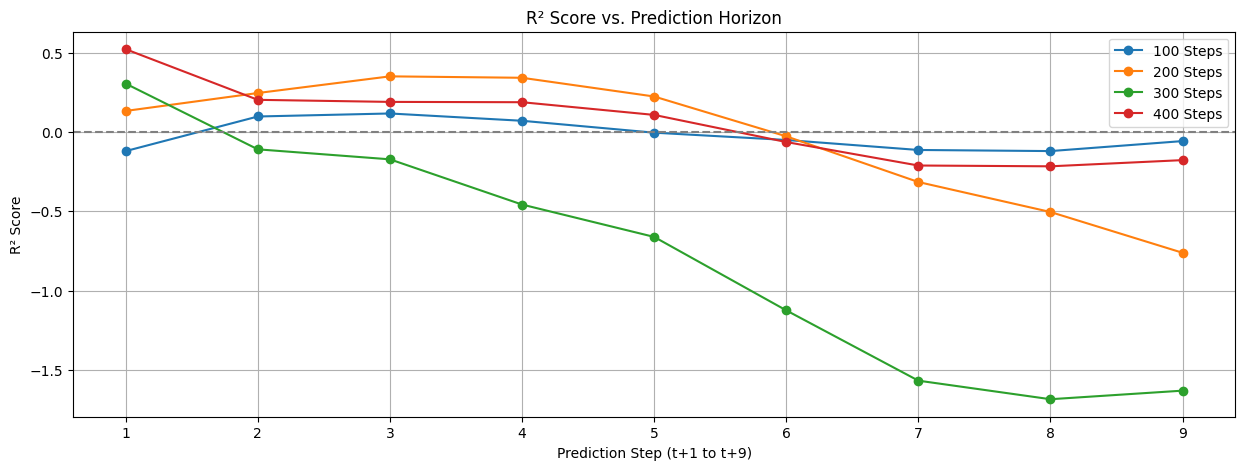

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
